<div align="center">
    <img src="https://storage.googleapis.com/kaggle-media/competitions/Spaceship%20Titanic/joel-filipe-QwoNAhbmLLo-unsplash.jpg" alt="Rohlic" width="600">
</div>

# Spaceship Titanic Challenge

Welcome to the **Spaceship Titanic** competition! In this challenge set in the year 2912, you’ll help determine which passengers were transported to an alternate dimension after a spacetime anomaly struck the maiden voyage of the Spaceship Titanic.

---

## Overview

- **Task:** Predict whether each passenger was transported.
- **Metric:** Classification accuracy.
- **Submission:** CSV with `PassengerId` and `Transported` (True/False).

---

## Data

- **train.csv:**  
  ~8,700 records with features such as PassengerId, HomePlanet, CryoSleep, Cabin, Destination, Age, VIP, and spending details, plus the target `Transported`.

- **test.csv:**  
  ~4,300 records without the target.



# EDA

In [1]:
# -*- coding: utf_8 -*-
#
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import matplotlib as mpl
import seaborn as sns
mpl.style.use('ggplot')
sns.set_style('white')

from IPython import display
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'last'
import warnings
warnings.filterwarnings('ignore')

raw_data = pd.read_csv('./train.csv')
raw_data_test = pd.read_csv('./test.csv')

data1 = raw_data.copy(deep=True)

In [35]:
data_cleaner = [data1, raw_data_test]
print(raw_data.info())
raw_data.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB
None


PassengerId HomePlanet CryoSleep     Cabin    Destination   Age    VIP  \
5492     5859_01      Earth     False   E/371/P            NaN  23.0  False   
5537     5902_01       Mars     False   D/177/S  PSO J318.5-22  34.0  False   
7107     7576_01     Europa     False   D/239/P    TRAPPIST-1e  23.0  False   
5982     6334_04      Earth      True  G/1028/S  PSO J318.5-22   0.0  False   
4573     4874_02       Mars      True   F/925/S    TRAPPIST-1e  18.0  False   
5171     5522_02      Earth     False  F/1059/S    TRAPPIST-1e  20.0  False   
8325     8889_01        NaN     False  G/1439/P    55 Cancri e  17.0  False   
1881     2009_01     Europa     False    B/59/P    TRAPPIST-1e  31.0  False   
2745     2945_01      Earth      True   G/479/P    55 Cancri e  39.0  False   
2427     2599_01      Earth      True       NaN    TRAPPIST-1e  21.0  False   

      RoomService  FoodCourt  ShoppingMall    Spa  VRDeck              Name  \
5492          0.0      456.0        2624.0  912.0     8.0   Leene Griffince   
5537        162.0        0.0         690.0   28.0     0.0        Igrish Win   
7107         30.0     2237.0           1.0   49.0    52.0     Mergas Alenat   
5982          0.0        0.0           0.0    0.0     0.0       Vick Jenson   
4573          0.0        0.0           0.0    0.0     0.0       Cruses Cusa   
5171          0.0        0.0           0.0  703.0     0.0  Ollip Hinglendez   
8325          0.0        0.0         615.0    0.0     0.0  Erman Russelloyd   
1881          0.0        0.0           0.0    0.0     0.0   Aldibah Contery   
2745          0.0        0.0           0.0    0.0     0.0    Jeanie Moodsey   
2427          0.0        0.0           0.0    0.0     0.0    Hery Bardinard   

      Transported  
5492         True  
5537        False  
7107         True  
5982         True  
4573         True  
5171         True  
8325        False  
1881        False  
2745         True  
2427        False

In [36]:

print(f'Duplicates in train set: {raw_data.duplicated().sum()}, ({raw_data.duplicated().sum()/len(raw_data)*100}%) duplicate rows in the training data')
print(f'Duplicates in test set: {raw_data_test.duplicated().sum()}, ({raw_data_test.duplicated().sum()/len(raw_data_test)*100}%) duplicate rows in the test data')


Duplicates in train set: 0, (0.0%) duplicate rows in the training data
Duplicates in test set: 0, (0.0%) duplicate rows in the test data


In [37]:
print(f'Null values in train set: \n{raw_data.isnull().sum()}')
print('-'*100)
print(f'Null values in test set: \n{raw_data_test.isnull().sum()}')
raw_data.describe(include='all')

Null values in train set: 
PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64
----------------------------------------------------------------------------------------------------
Null values in test set: 
PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64


PassengerId HomePlanet CryoSleep    Cabin  Destination          Age  \
count         8693       8492      8476     8494         8511  8514.000000   
unique        8693          3         2     6560            3          NaN   
top        0001_01      Earth     False  G/734/S  TRAPPIST-1e          NaN   
freq             1       4602      5439        8         5915          NaN   
mean           NaN        NaN       NaN      NaN          NaN    28.827930   
std            NaN        NaN       NaN      NaN          NaN    14.489021   
min            NaN        NaN       NaN      NaN          NaN     0.000000   
25%            NaN        NaN       NaN      NaN          NaN    19.000000   
50%            NaN        NaN       NaN      NaN          NaN    27.000000   
75%            NaN        NaN       NaN      NaN          NaN    38.000000   
max            NaN        NaN       NaN      NaN          NaN    79.000000   

          VIP   RoomService     FoodCourt  ShoppingMall           Spa  \
count    8490   8512.000000   8510.000000   8485.000000   8510.000000   
unique      2           NaN           NaN           NaN           NaN   
top     False           NaN           NaN           NaN           NaN   
freq     8291           NaN           NaN           NaN           NaN   
mean      NaN    224.687617    458.077203    173.729169    311.138778   
std       NaN    666.717663   1611.489240    604.696458   1136.705535   
min       NaN      0.000000      0.000000      0.000000      0.000000   
25%       NaN      0.000000      0.000000      0.000000      0.000000   
50%       NaN      0.000000      0.000000      0.000000      0.000000   
75%       NaN     47.000000     76.000000     27.000000     59.000000   
max       NaN  14327.000000  29813.000000  23492.000000  22408.000000   

              VRDeck            Name Transported  
count    8505.000000            8493        8693  
unique           NaN            8473           2  
top              NaN  Gollux Reedall        True  
freq             NaN               2        4378  
mean      304.854791             NaN         NaN  
std      1145.717189             NaN         NaN  
min         0.000000             NaN         NaN  
25%         0.000000             NaN         NaN  
50%         0.000000             NaN         NaN  
75%        46.000000             NaN         NaN  
max     24133.000000             NaN         NaN

In [38]:
print(raw_data.nunique())
print(raw_data.dtypes)

PassengerId     8693
HomePlanet         3
CryoSleep          2
Cabin           6560
Destination        3
Age               80
VIP                2
RoomService     1273
FoodCourt       1507
ShoppingMall    1115
Spa             1327
VRDeck          1306
Name            8473
Transported        2
dtype: int64
PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object


In [39]:
exp_feats = ['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']
cat_feats = ['VIP','HomePlanet','Destination','CryoSleep']
qual_feats = ['PassengerId','Cabin','Name', 'Age']
target = ['Transported']


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'RoomService'}>],
       [<Axes: title={'center': 'FoodCourt'}>,
        <Axes: title={'center': 'ShoppingMall'}>],
       [<Axes: title={'center': 'Spa'}>,
        <Axes: title={'center': 'VRDeck'}>]], dtype=object)

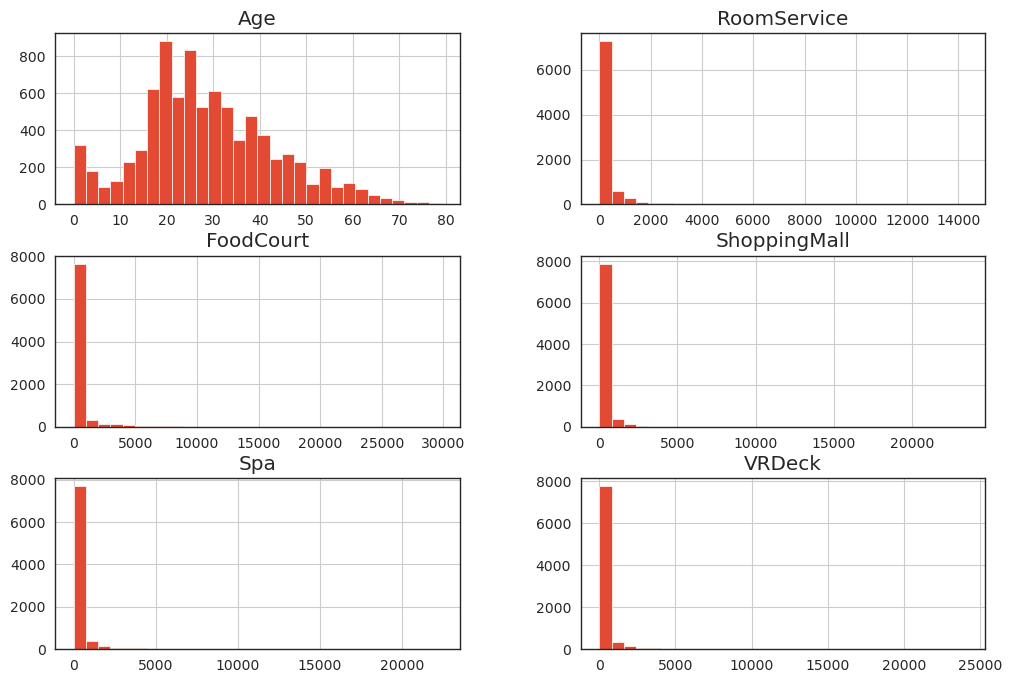

In [40]:

data1.hist(figsize=(12, 8),bins = 30)

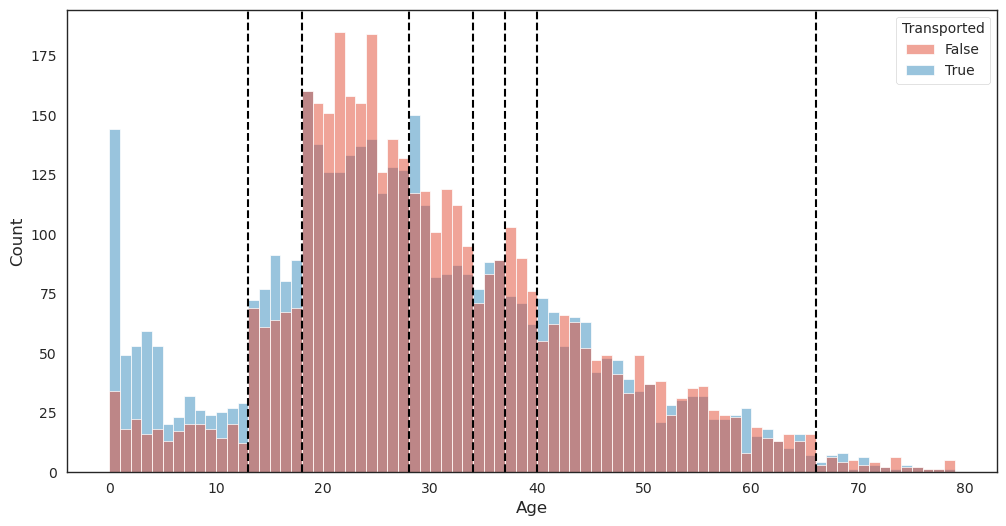

In [41]:
plt.figure(figsize=(12,6))
sns.histplot(data= data1, x='Age', hue = 'Transported',binwidth=1)
plt.axvline(x=13, color='black', linestyle='--')
plt.axvline(x=18, color='black', linestyle='--')
plt.axvline(x=28, color='black', linestyle='--')
plt.axvline(x=34, color='black', linestyle='--')
plt.axvline(x=37, color='black', linestyle='--')
plt.axvline(x=40, color='black', linestyle='--')
plt.axvline(x=66, color='black', linestyle='--')


In [42]:
def devide_into_age_groups(data):
    data['Age_group'] = np.nan
    data.loc[(data['Age'] <= 12), 'Age_group'] = 'Age_0_12'
    data.loc[(data['Age'] > 12) & (data['Age'] <= 17), 'Age_group'] = 'Age_13_17'
    data.loc[(data['Age'] > 17) & (data['Age'] <= 27), 'Age_group'] = 'Age_18_27'
    data.loc[(data['Age'] > 27) & (data['Age'] <= 33), 'Age_group'] = 'Age_28_33'
    data.loc[(data['Age'] > 33) & (data['Age'] <= 36), 'Age_group'] = 'Age_34_36'
    data.loc[(data['Age'] > 36) & (data['Age'] <= 39), 'Age_group'] = 'Age_36_39'
    data.loc[(data['Age'] > 39) & (data['Age'] <= 65), 'Age_group'] = 'Age_40_65'
    data.loc[(data['Age'] > 65) , 'Age_group'] = 'Age_65+'
    return data

In [43]:
for data in data_cleaner:
    data = devide_into_age_groups(data)



Text(0.5, 1.0, 'Age group vs Transported')

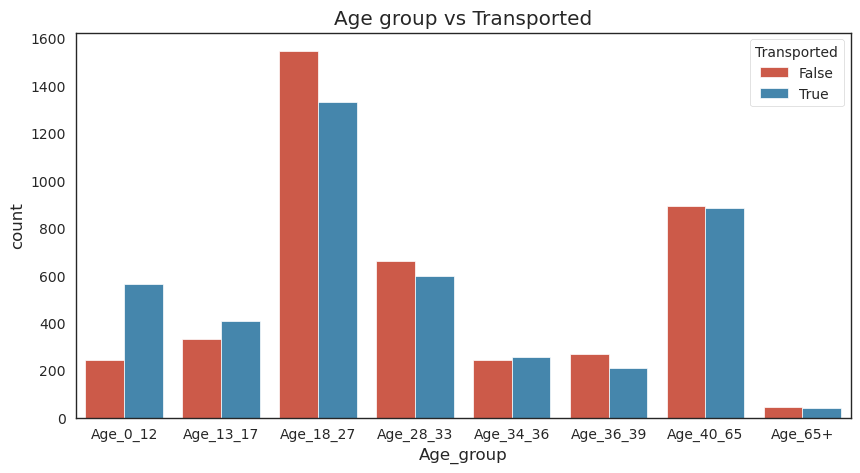

In [44]:
plt.figure(figsize=(10,5))
sns.countplot(data=data1, x='Age_group', hue='Transported', order=['Age_0_12', 'Age_13_17', 'Age_18_27', 'Age_28_33', 'Age_34_36','Age_36_39','Age_40_65', 'Age_65+'], orient='v')
plt.title('Age group vs Transported')

In [45]:
InteractiveShell.ast_node_interactivity = 'last'
for data in data_cleaner:
    data[exp_feats] = data[exp_feats].clip(0)
    data['Expenditure'] = data[exp_feats].sum(axis = 1)
    data['No_spending'] = (data['Expenditure'] == 0).astype(int)

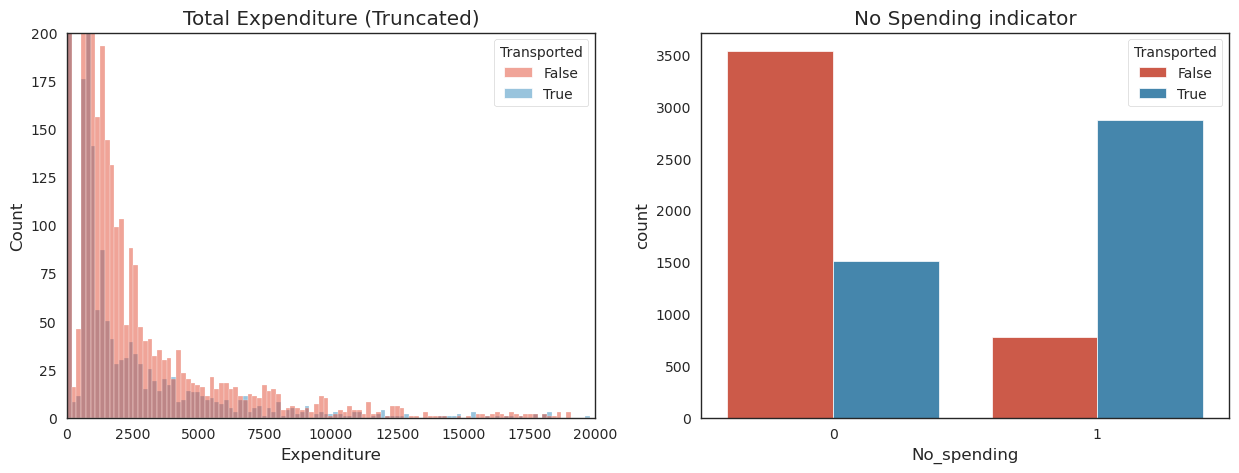

In [46]:


fig, (hist,bar) = plt.subplots(1,2, figsize=(15,5))

sns.histplot(data = data1, x= 'Expenditure', hue='Transported', bins=200, ax=hist)
hist.set_xlabel('Expenditure')
hist.set_title('Total Expenditure (Truncated)')
hist.set_ylim([0, 200])
hist.set_xlim([0, 20000])
sns.countplot(data = data1, x= 'No_spending', hue='Transported', ax=bar)
bar.set_title('No Spending indicator')
plt.show()

In [47]:
for data in data_cleaner:
    data['Group_number'] = data['PassengerId'].apply(lambda x: x.split('_')[0]).astype(int)
    data['Group_size'] = data['Group_number'].map(lambda x: data['Group_number'].value_counts()[x])
    data['Passanger_number'] = data['PassengerId'].apply(lambda x: x.split('_')[1]).astype(int)

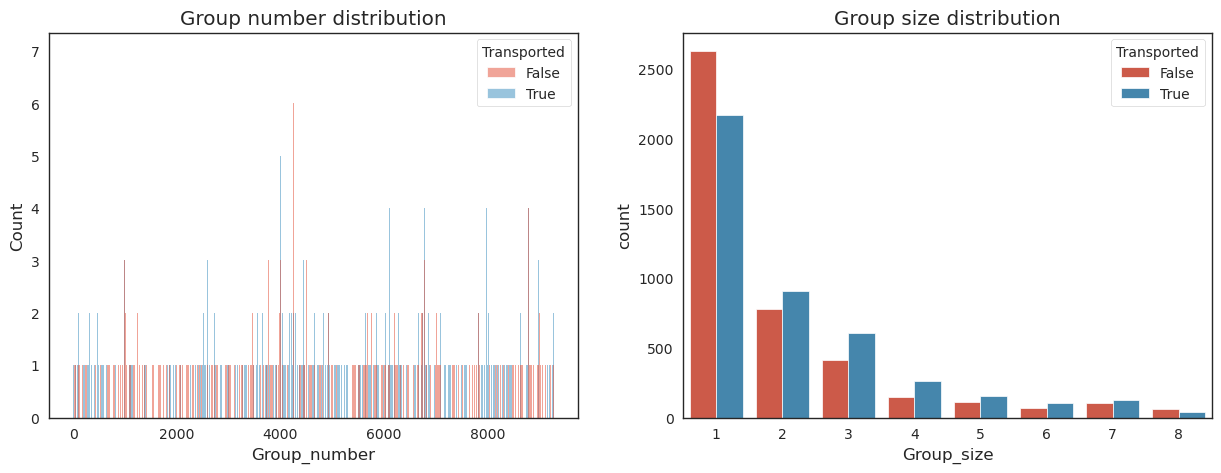

In [48]:
fig, (plt1,plt2) = plt.subplots(1,2, figsize=(15,5))
sns.histplot(data=data1, x='Group_number', hue='Transported', binwidth=1, ax=plt1)
plt1.set_title('Group number distribution')
sns.countplot(data=data1, x='Group_size', hue='Transported', ax=plt2)
plt2.set_title('Group size distribution')
plt.show()

Text(0.5, 1.0, 'Group2_3_4 vs Transported')

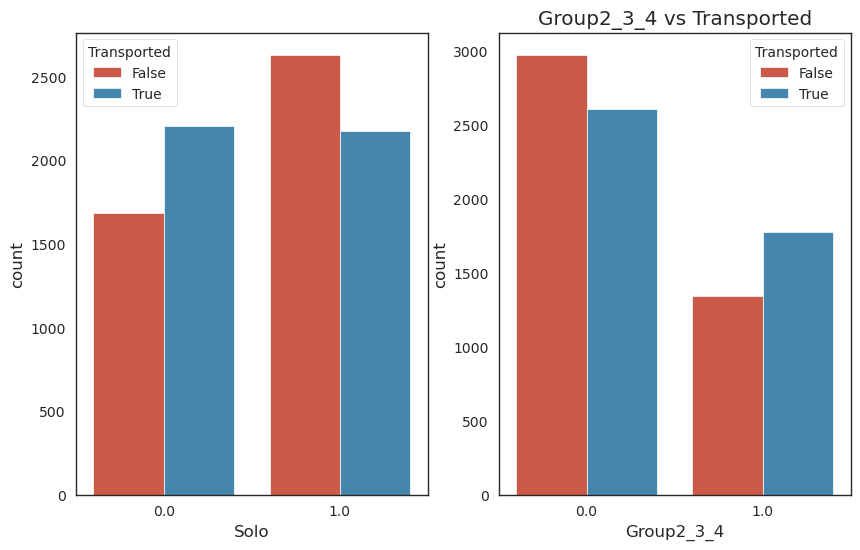

In [49]:
for data in data_cleaner:
    data.loc[data['Group_size'] == 1, 'Solo'] = 1
    data.loc[data['Group_size'] > 1, 'Solo'] = 0
    data.loc[(data['Group_size'] > 1) & (data['Group_size'] < 5), 'Group2_3_4'] = 1
    data.loc[(data['Group_size'] >= 5) | (data['Group_size'] == 1), 'Group2_3_4'] = 0

fig, ax = plt.subplots(1,2, figsize=(10,6))
sns.countplot(data = data1, x= 'Solo', hue='Transported', ax = ax[0])
plt.title('Solo vs Transported')
sns.countplot(data = data1, x= 'Group2_3_4', hue='Transported', ax = ax[1])
plt.title('Group2_3_4 vs Transported')


In [50]:
for data in data_cleaner:
    data['Cabin'].fillna('Z/9999/Z', inplace=True)
    data['Deck'] = data['Cabin'].apply(lambda x: x.split('/')[0])
    data['Room'] = data['Cabin'].apply(lambda x: x.split('/')[1])
    data['Side'] = data['Cabin'].apply(lambda x: x.split('/')[2])

    data.loc[data['Deck'] == 'Z', 'Deck'] = np.nan
    data.loc[data['Room'] == '9999', 'Room'] = np.nan
    data.loc[data['Side'] == 'Z', 'Side'] = np.nan
    data.drop('Cabin', axis=1, inplace=True)


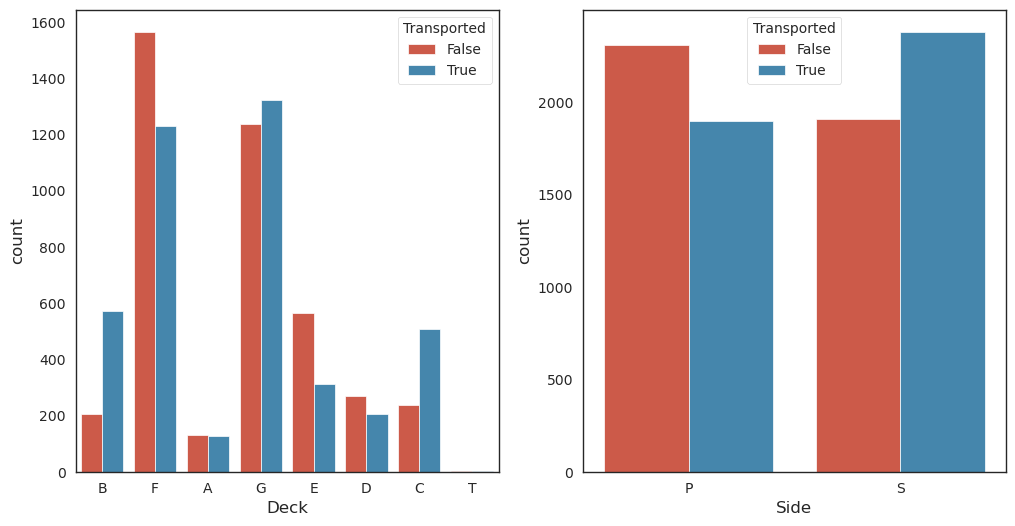

In [51]:
fig,ax = plt.subplots(1,2, figsize=(12,6))

sns.countplot(data=data1, x = 'Deck' , hue = 'Transported',ax=ax[0])

sns.countplot(data=data1, x = 'Side' , hue = 'Transported',ax=ax[1])

plt.show()

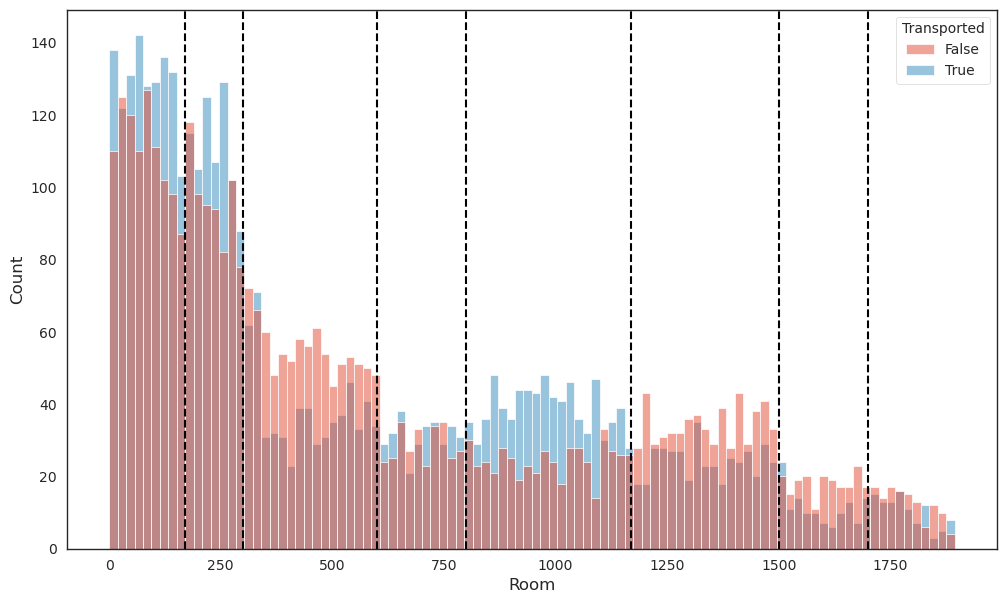

In [52]:
for data in data_cleaner:
  data['Room'] = data['Room'].astype('float64')
plt.figure(figsize=(12,7))
sns.histplot(data=data1, x = 'Room', hue = 'Transported', bins=100)
plt.axvline(x=170, color='black', linestyle='--')
plt.axvline(x=300, color='black', linestyle='--')
plt.axvline(x=600, color='black', linestyle='--')
plt.axvline(x=800, color='black', linestyle='--')
plt.axvline(x=1170, color='black', linestyle='--')
plt.axvline(x=1500, color='black', linestyle='--')
plt.axvline(x=1700, color='black', linestyle='--')

In [53]:
data_cleaner[0].Room.max()

1894.0

In [80]:
def room_region_class(data):
    data['Room'] = data['Room'].astype(float)
    data['Room_region1'] = (data['Room'] < 170).astype(int)
    data['Room_region2'] = ((data['Room'] >= 170) & (data['Room'] < 300)).astype(int)
    data['Room_region3'] = ((data['Room'] >= 300) & (data['Room'] < 600)).astype(int)
    data['Room_region4'] = (((data['Room'] >= 600) & (data['Room'] < 800)) | ((data['Room'] >= 1700))).astype(int)
    data['Room_region5'] = ((data['Room'] >= 800) & (data['Room'] < 1170)).astype(int)
    data['Room_region6'] = ((data['Room'] >= 1170) & (data['Room'] < 1500)).astype(int)
    data['Room_region7'] = ((data['Room'] >= 1500) & (data['Room'] < 1700)).astype(int)
    # Create column with regions for each row to allow plotting
    data['Room_region'] = data['Room'].apply(lambda x: 1 if x < 170 else 2 if x < 300 else 3 if x < 600 else 4 if x < 800 else 5 if x < 1170 else 6 if x < 1500 else 7 if x < 1700 else 4)
    data.loc[data.Room == 9999, ['Room_region']] = np.nan
    data.loc[data.Room == 9999, ['Room_region4']] = 0
    return data

In [ ]:
#One hot encoding for the rooms
for data in data_cleaner:
    data = room_region_class(data)


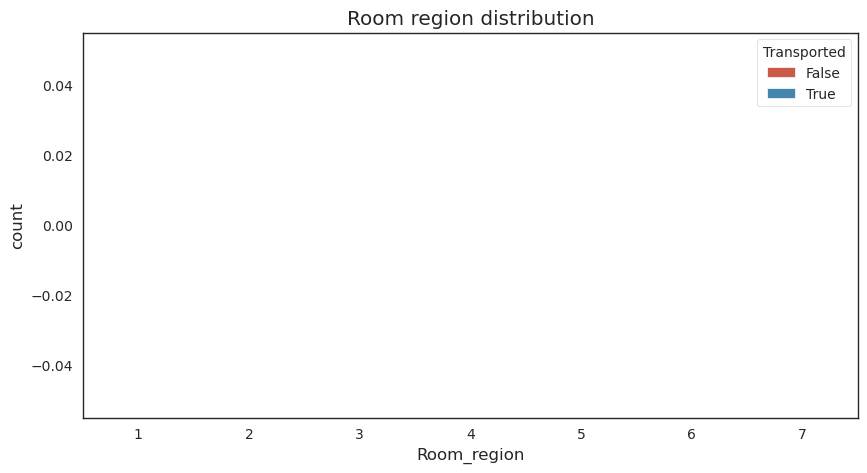

In [55]:
fig= plt.figure(figsize=(10,5))
fig = sns.countplot(data = data1, x= 'Room_region', hue='Transported', order = [1,2,3,4,5,6,7])
fig.set_title('Room region distribution')
plt.show()

In [56]:
for data in data_cleaner:
    data['Name'].fillna('Unknown Unknown', inplace=True)
    data['Surname'] = data['Name'].apply(lambda x: x.split(' ')[-1])
    data['Surname'] = data['Surname'].replace('Unknown', np.nan)

    



# IMPUTATION

In [57]:
missing_values_cols = list(data.columns[data.isna().sum() > 0])

In [58]:
categorical_columns = list(data_cleaner[0].select_dtypes(include=['object']).columns)
print(categorical_columns)
numeric_columns = list(data_cleaner[0].columns[~data_cleaner[0].columns.isin(categorical_columns +['Transported'])])
print(numeric_columns)

['PassengerId', 'HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Name', 'Age_group', 'Deck', 'Side', 'Surname']
['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Expenditure', 'No_spending', 'Group_number', 'Group_size', 'Passanger_number', 'Solo', 'Group2_3_4', 'Room', 'Room_region1', 'Room_region2', 'Room_region3', 'Room_region4', 'Room_region5', 'Room_region6', 'Room_region7', 'Room_region']


In [59]:
def basic_impute_for_modeling(data, categorical_columns, numeric_columns):
    data_imputed = [data[0].copy(deep=True), data[1].copy(deep=True)]
    missing_values_cols = data_imputed[0].columns[list((data_imputed[0].isna().sum() > 0))]
    for data in data_imputed:
        for col in missing_values_cols:
            if data[col].dtype == 'object':
                data[col].fillna('Missing', inplace=True)
            else:
                data[col].fillna(data[col].mean(), inplace=True)
    for i in range(2):
        # Convert categorical columns to string
        for col in categorical_columns:
            data_imputed[i][col] = data_imputed[i][col].astype(str)
        
        # Convert numeric columns individually
        for col in numeric_columns:
            data_imputed[i][col] = data_imputed[i][col].round().astype(int)

    return data_imputed

In [60]:
from catboost import CatBoostClassifier, CatBoostRegressor
def train_imputer(data, imputed, target, remove_rows_na=None):
    trainX = imputed.loc[data[target].notna(), imputed.columns[~imputed.columns.isin([target,'Transported'])]]
    trainY = imputed.loc[data[target].notna(), target]
    if data[target].nunique() == 2:
        predictor =  CatBoostClassifier(verbose=100)
    elif  data[target].nunique() < 15:
        predictor =  CatBoostClassifier(loss_function='MultiClass', verbose=100)
    elif data[target].dtype == np.float64:
        predictor = CatBoostRegressor(verbose=100)
    categorical_columns = list(trainX.select_dtypes(include=['object']).columns)
    predictor.fit(trainX, trainY, cat_features=categorical_columns)
    return predictor

In [61]:
def impute_columns(data, data_imputed, missing_values_cols):
    
    for idx, target in enumerate(missing_values_cols):
        predictor = train_imputer(data[0], data_imputed[0], target  )
        print(f'predictor for {target} fitted')
        for orginal, imputed in zip(data, data_imputed):
            result = predictor.predict(imputed.loc[:,imputed.columns[~imputed.columns.isin([target, 'Transported'])]])
            orginal.loc[orginal[target].isna(), target] = result[orginal[target].isna()]
        print('values imputed')
        print(f'{idx+1}/{len(missing_values_cols)}')
        print('---'*10)
    return data 

In [62]:
data_imputed = basic_impute_for_modeling(data_cleaner, categorical_columns, numeric_columns)
data_cleaner = impute_columns(data_cleaner, data_imputed, missing_values_cols = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Age_group', 'Deck', 'Side', 'Room_region'])

Learning rate set to 0.088248
0:	learn: 0.9824417	total: 22.9ms	remaining: 22.9s
100:	learn: 0.0597624	total: 2.48s	remaining: 22.1s
200:	learn: 0.0463383	total: 5.08s	remaining: 20.2s
300:	learn: 0.0389537	total: 7.73s	remaining: 17.9s
400:	learn: 0.0341524	total: 10.5s	remaining: 15.7s
500:	learn: 0.0305624	total: 13.2s	remaining: 13.2s
600:	learn: 0.0273110	total: 16.1s	remaining: 10.7s
700:	learn: 0.0247476	total: 18.9s	remaining: 8.05s
800:	learn: 0.0225938	total: 21.9s	remaining: 5.43s
900:	learn: 0.0205442	total: 24.8s	remaining: 2.72s
999:	learn: 0.0188975	total: 27.5s	remaining: 0us
predictor for HomePlanet fitted
values imputed
1/13
------------------------------
Learning rate set to 0.025661
0:	learn: 0.6285446	total: 11.1ms	remaining: 11.1s
100:	learn: 0.1065168	total: 898ms	remaining: 7.99s
200:	learn: 0.0991708	total: 1.74s	remaining: 6.91s
300:	learn: 0.0945049	total: 2.67s	remaining: 6.21s
400:	learn: 0.0896590	total: 3.74s	remaining: 5.59s
500:	learn: 0.0859342	total: 

In [64]:
for data in data_cleaner:
  na_Before = data['Surname'].isnull().sum()
  grouped = data.groupby(['Group_number','Surname']).size().unstack(fill_value = 0)
  index = data[data['Surname'].isna() & data['Group_number'].isin(grouped.index)].index
  #index = data[data['HomePlanet'].isna() & data['Group_number'].isin(groupBy.index)].index
  data.loc[index,'Surname'] = data.loc[index,'Group_number'].map(lambda x: grouped.idxmax(axis=1)[x])
  na_After = data['Surname'].isnull().sum()
  print(f'Missing values before: {na_Before}, after: {na_After}')

for data in data_cleaner:
    data['Surname'].fillna('Missing', inplace=True)
    data['Surname_size'] = data['Surname'].map(lambda x: data['Surname'].value_counts()[x])
    family_identity_col = ['HomePlanet','Group_number','Surname']
    family_grouped = pd.DataFrame(data.groupby(family_identity_col)[['Surname']].value_counts()).reset_index().rename(columns={'count':'Family_size'})
    data[['Family_size']] = data.merge(family_grouped, how='left', on=family_identity_col)[['Family_size']]
    data['Surname'].replace('Missing', np.nan, inplace=True)
    data['Surname_size'].loc[data['Surname'].isnull()] = 0
    data.loc[data['Surname'] == np.nan,'Solo'] = 1
    data.loc[:,'Surname'].fillna('Missing', inplace = True)

Missing values before: 200, after: 104
Missing values before: 94, after: 51


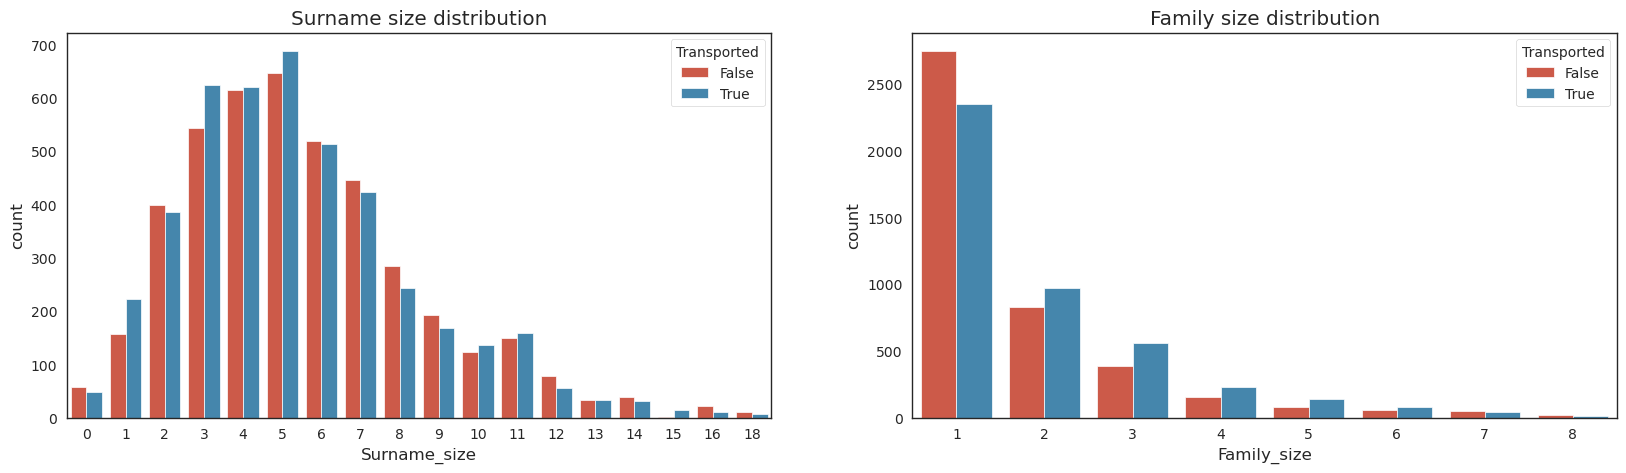

In [65]:
fig, ax = plt.subplots(1,2, figsize=(20,5))
sns.countplot(data = data1, x= 'Surname_size', hue='Transported', ax = ax[0])
ax[0].set_title('Surname size distribution')
sns.countplot(data = data1, x= 'Family_size', hue='Transported', ax = ax[1])
ax[1].set_title('Family size distribution')
plt.show()

In [66]:
# imputed_data = [pd.read_csv('imputed_train.csv', index_col=0), pd.read_csv('imputed_test.csv', index_col=0)]

In [67]:
# imputed_data[0]

### **SURNAME**

In [68]:
for data in data_cleaner:
  na_Before = data['Surname'].isnull().sum()
  grouped = data.groupby(['Group_number','Surname']).size().unstack(fill_value = 0)
  index = data[data['Surname'].isna() & data['Group_number'].isin(grouped.index)].index
  #index = data[data['HomePlanet'].isna() & data['Group_number'].isin(groupBy.index)].index
  data.loc[index,'Surname'] = data.loc[index,'Group_number'].map(lambda x: grouped.idxmax(axis=1)[x])
  na_After = data['Surname'].isnull().sum()
  print(f'Missing values before: {na_Before}, after: {na_After}')

Missing values before: 0, after: 0
Missing values before: 0, after: 0


In [69]:
for data in data_cleaner:
  data.loc[data['Surname'].isna(),'Surname'] = 'Un'
  data['Family_Size'] = data['Surname'].map(lambda x: data['Surname'].value_counts()[x])
  data.loc[data['Surname'] == 'Un','Family_Size'] = 0
  data.loc[data['Surname'] == 'Un','Surname'] = np.nan
  data.loc[data['Surname'] == np.nan,'Solo'] = 1



In [70]:
for data in data_cleaner:
  data.loc[data['Family_Size'] == 3,'Family_size3'] = 1
  data.loc[data['Family_Size'] != 3,'Family_size3'] = 0
  data.loc[(data['Family_Size'] >6) & (data['Family_Size'] <9),'Family_size7_8'] = 1
  data.loc[(data['Family_Size'] <=6) | (data['Family_Size'] >=9),'Family_size7_8'] = 0

### **ROOM**

In [76]:
for data in data_cleaner:
    room_naBefore = data['Room'].isna().sum()
    room_rest_of_group = data.groupby(['Group_number', 'Room']).size().unstack(fill_value=0)
    index_roomNa_knownGroup = data[data['Room'].isna() & (data['Group_size'] >1) & data['Group_number'].isin(room_rest_of_group.index)].index
    data.loc[index_roomNa_knownGroup, 'Room'] = data.loc[index_roomNa_knownGroup, 'Group_number'].map(lambda x: room_rest_of_group.idxmax(axis=1)[x])
    room_naAfter = data['Room'].isna().sum()
    print(f'room missing values before: {room_naBefore}, after: {room_naAfter}')

room missing values before: 0, after: 0
room missing values before: 0, after: 0


<Figure size 1000x500 with 0 Axes>

<Axes: xlabel='Room', ylabel='Group_number'>

Text(0.5, 1.0, 'Room vs group coloured by group ')

<Figure size 1000x500 with 0 Axes>

<Axes: xlabel='Room', ylabel='Group_number'>

Text(0.5, 1.0, 'Room vs group coloured by group ')

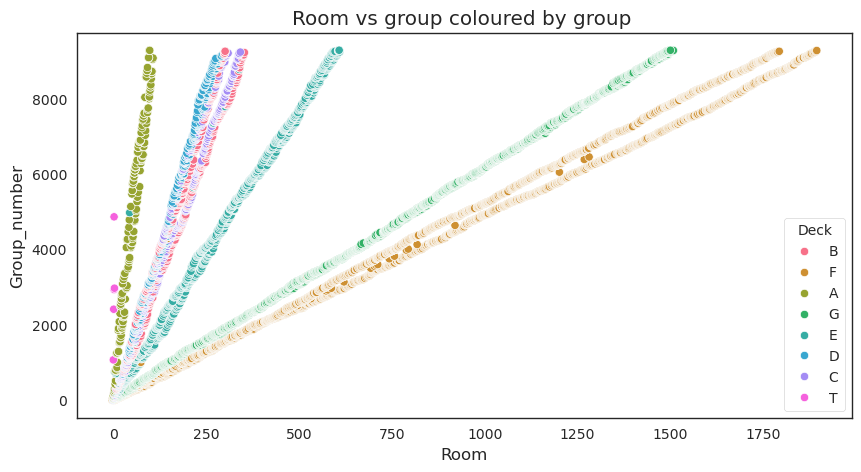

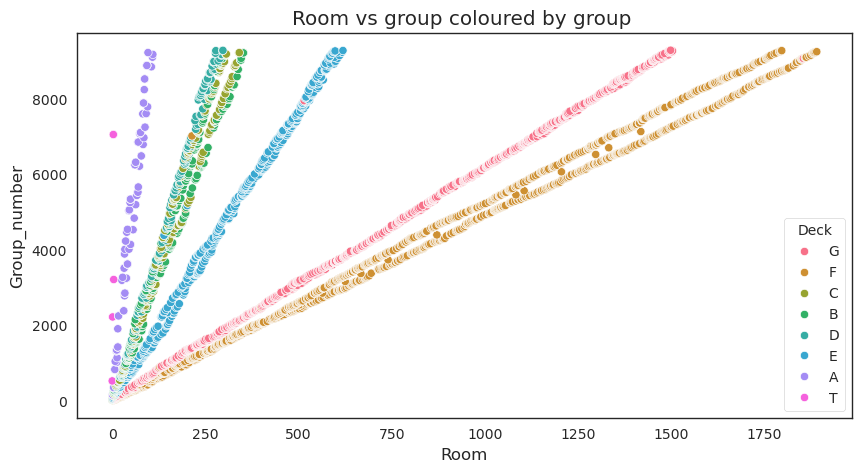

In [77]:

for data in data_cleaner:
    plt.figure(figsize=(10,5))
    sns.scatterplot(data = data, x= 'Room', y='Group_number', hue='Deck')
    plt.title('Room vs group coloured by group ')

In [78]:

from sklearn.linear_model import LinearRegression

for data in data_cleaner:
    na_Before = data['Room'].isna().sum()
    for deck in ['B', 'F', 'A', 'G', 'E', 'D', 'C', 'T']:
        data_deck = data.loc[data['Deck'] == deck]

        model = LinearRegression()
        if data_deck['Room'].isnull().sum() > 0:
            data_deck_train = data_deck.loc[~data_deck['Room'].isna()]
            data_deck_pred = data_deck.loc[data_deck['Room'].isna()]
            model.fit(data_deck_train['Group_number'].values.reshape(-1,1), data_deck_train['Room'].values.reshape(-1))
            data.loc[(data['Deck'] == deck) & data['Room'].isna(),'Room'] = model.predict(data_deck_pred['Group_number'].values.reshape(-1,1)).round(0).astype(int)




    na_After = data['Room'].isna().sum()
    print(f'Missing values before: {na_Before}, after: {na_After}')


Missing values before: 0, after: 0
Missing values before: 0, after: 0


<Figure size 1000x500 with 0 Axes>

<Axes: xlabel='Room', ylabel='Group_number'>

Text(0.5, 1.0, 'Room vs group coloured by group ')

<Figure size 1000x500 with 0 Axes>

<Axes: xlabel='Room', ylabel='Group_number'>

Text(0.5, 1.0, 'Room vs group coloured by group ')

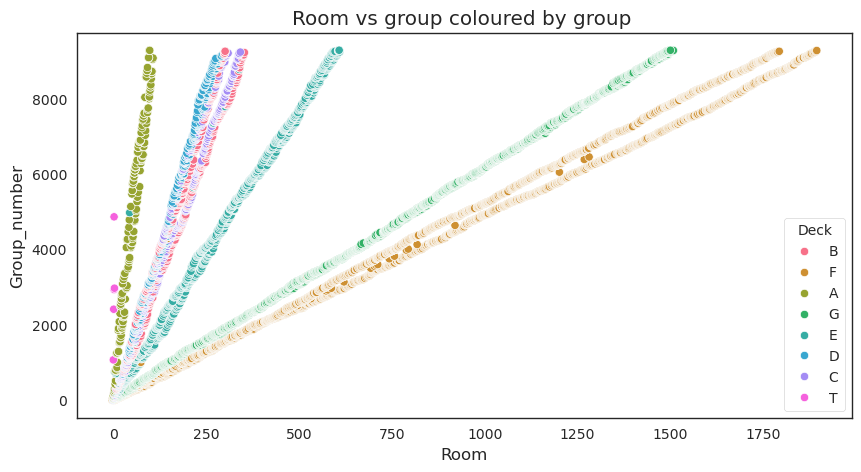

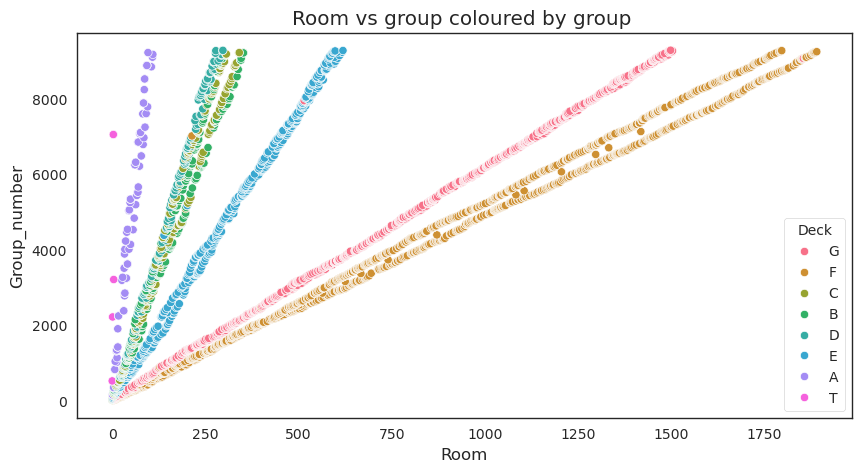

In [79]:

for data in data_cleaner:
    plt.figure(figsize=(10,5))
    sns.scatterplot(data = data, x= 'Room', y='Group_number', hue='Deck')
    plt.title('Room vs group coloured by group ')

In [81]:
for data in data_cleaner:
    data = room_region_class(data)


### **AGE**

In [86]:
data.Age_group.unique()

array(['Age_18_27', 'Age_28_33', 'Age_36_39', 'Age_40_65', 'Age_13_17',
       'Age_65+', 'Age_34_36', 'Age_0_12'], dtype=object)

In [101]:

median_ages = data_deck_train.groupby('Age_group')['Age'].median().to_dict()
print(median_ages)
for data in data_cleaner:
    data.loc[data.Age.isna(), 'Age'] = data.loc[data.Age.isna(),'Age_group'].map(median_ages)

{'Age_0_12': 6.5, 'Age_13_17': 15.0, 'Age_18_27': 23.0, 'Age_28_33': 30.0, 'Age_34_36': 35.0, 'Age_36_39': 38.0, 'Age_40_65': 47.5, 'Age_65+': 69.0}


In [108]:
from tabulate import tabulate

In [129]:
from prettytable import PrettyTable
table = PrettyTable()
for data, name in zip(data_cleaner, ['train','test']):
    data.isna().sum().to_frame().T
    


PassengerId  HomePlanet  CryoSleep  Destination  Age  VIP  RoomService  \
0            0           0          0            0    0    0            0   

   FoodCourt  ShoppingMall  Spa  VRDeck  Name  Transported  Age_group  \
0          0             0    0       0     0            0          0   

   Expenditure  No_spending  Group_number  Group_size  Passanger_number  Solo  \
0            0            0             0           0                 0     0   

   Group2_3_4  Deck  Room  Side  Room_region1  Room_region2  Room_region3  \
0           0     0     0     0             0             0             0   

   Room_region4  Room_region5  Room_region6  Room_region7  Room_region  \
0             0             0             0             0            0   

   Surname  Surname_size  Family_size  Family_Size  Family_size3  \
0        0             0            0            0             0   

   Family_size7_8  
0               0

PassengerId  HomePlanet  CryoSleep  Destination  Age  VIP  RoomService  \
0            0           0          0            0    0    0            0   

   FoodCourt  ShoppingMall  Spa  VRDeck  Name  Age_group  Expenditure  \
0          0             0    0       0     0          0            0   

   No_spending  Group_number  Group_size  Passanger_number  Solo  Group2_3_4  \
0            0             0           0                 0     0           0   

   Deck  Room  Side  Room_region1  Room_region2  Room_region3  Room_region4  \
0     0     0     0             0             0             0             0   

   Room_region5  Room_region6  Room_region7  Room_region  Surname  \
0             0             0             0            0        0   

   Surname_size  Family_size  Family_Size  Family_size3  Family_size7_8  
0             0            0            0             0               0

In [ ]:
# data_cleaner[0].to_csv('imputed_train.csv')
# data_cleaner[1].to_csv('imputed_test.csv')

# FEATURE ENG

In [2]:
data_cleaner = [pd.read_csv('imputed_train.csv'), pd.read_csv('imputed_test.csv')]

In [3]:
from sklearn.model_selection import train_test_split
val = data_cleaner[0].sample(frac=0.2, replace=False)
submition_cleaner = [ data_cleaner[0].copy(deep=True), data_cleaner[1].copy(deep=True)]
data_cleaner = [data_cleaner[0].loc[~data_cleaner[0].index.isin(val.index)].reset_index(drop=True), val.reset_index(drop=True)]



In [ ]:
numeric_features = ['Age','RoomService','FoodCourt', 'hoppingMall','Spa', 'VRDeck', 'Expenditure', 'Group_number','Room']
categorical_features = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Age_group', 'Deck', 'Side', 'Group_size','Room_region']
TARGET = 'Transported'

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder

class FeatureEngineering():
    def __init__(self, data_cleaner, best_features = None):
        self.data_cleaner = [data.copy(deep=True) for data in data_cleaner]
        self.best_features = best_features
        self.select_feauteres = False if best_features is None else True

        self.state_dict = {}

    def encode_category(self, columns):
        le = OrdinalEncoder()
        le.fit(self.data_cleaner[0][columns])
        for data in self.data_cleaner:
            data[columns] = le.transform(data[columns])

        for data in self.data_cleaner:
            data.loc[:,['CryoSleep','VIP']] = data.loc[:,data.columns.intersection(['CryoSleep','VIP', TARGET])].astype(bool).astype(int)

    def apply_count_mean_woe_mapings(self, columns):
        new_features = []
        for col in columns:
            count = self.data_cleaner[0][col].value_counts().to_dict()
            count_label = dict(zip(sorted(count.values()), list(range(0, len(count)))))
            target_p =  self.data_cleaner[0].groupby(col)[TARGET].mean()
            target_mean = target_p.to_dict()
            eps = 1e-6
            woe = dict( np.log(np.clip((1 - target_p), eps, 1-eps) / np.clip(target_p, eps, 1-eps))) # Survived/Transported

            for data in self.data_cleaner:
                data.loc[:,col + '_count'] = data[col].map(count).fillna(0)
                data.loc[:,col + '_count_label'] = data[col+'_count'].map(count_label).fillna(-1)
                data.loc[:,col + '_target_mean'] =  data[col].map(target_mean).fillna(-1)
                data.loc[:,col + '_woe'] = data[col].map(woe).fillna(1)
            new_features.extend([col + name for name in ['_count', '_count_label','_target_mean','_woe']])


    def apply_cluster_mean(self, col, cluster_columns, cluster_number, suffix='', create_ohe=True):

        ss = StandardScaler()
        ohe = OneHotEncoder(handle_unknown='ignore',sparse_output=False)

        ss.fit(self.data_cleaner[0][cluster_columns])
        temp_cleaner = [ss.transform(data[cluster_columns]) for data in self.data_cleaner]

        model = KMeans(cluster_number)
        _ = model.fit(temp_cleaner[0])
        
        cluster_column = f'{col}_cluster_{suffix}'
        self.data_cleaner[0].loc[:,cluster_column] = model.labels_
        for data, temp in zip(self.data_cleaner[1:], temp_cleaner[1:]):
            data.loc[:,cluster_column] = model.predict(temp)
        new_features = [cluster_column]	
        
        if create_ohe:
            ohe.fit(self.data_cleaner[0][[cluster_column]])
            ohe_columns = [f'{col}_ohe_{i}' for i in range((len(ohe.categories_[0])))]
            for data in self.data_cleaner:
                data.loc[:,ohe_columns] = pd.DataFrame(ohe.transform(data[[cluster_column]]), columns=ohe_columns, index = data.index)
            new_features.extend(ohe_columns)

        cluster_mean = np.log1p(self.data_cleaner[0].groupby(cluster_column)['Transported'].mean()).to_dict()
        for data in self.data_cleaner:

            data.loc[:,f'{col}_cluster_mean_{suffix}'] = data[cluster_column].map(cluster_mean).fillna(self.data_cleaner[0].Transported.mean())
        new_features.append(f'{col}_cluster_mean_{suffix}')

            
    from yellowbrick.cluster.elbow import KElbowVisualizer 
def find_optimal_custer_number(data_cleaner, base_column, cluster_columns):
	ss = StandardScaler()
	temp_scaled_data = ss.fit_transform(data_cleaner[0][cluster_columns])
	model = KElbowVisualizer(KMeans(), k=(3,25), metric = 'calinski_harabasz', timings=False)
	_ = model.fit(np.array(temp_scaled_data))
	cluster_number =  model.elbow_value_

	_ = plt.xlabel('Number of clusters (k)')
	_ = plt.ylabel('Calinski-Harabasz Index')
	_ = plt.title("Clustering on encoded featured from "+base_column)
	plt.show()
	print(cluster_number)
	return cluster_number


from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,  roc_curve
def cross_val_features_single_feature_model(data_cleaner, base_column, new_features, cluster_number, preprocessing_for_each_strata = None):
    # to prevent leakage in crossvalidation process it is nessesery to recreate features for given train and test folds. 
	cv = StratifiedKFold(10, random_state= 10, shuffle=True)
	cv_results = pd.DataFrame(columns = [new_features])
	for cv_idx,(train_idx, test_idx) in enumerate(cv.split(np.zeros(len(data_cleaner[0])),data_cleaner[0]['Transported'])):
		strata_cleaner = [data_cleaner[0].loc[split,:].copy(deep=True) for split in [train_idx, test_idx]]
		strata_new_features = []
		if preprocessing_for_each_strata:
			strata_cleaner, feature_names = preprocessing_for_each_strata(strata_cleaner, [base_column])
			strata_new_features = feature_names

		if cluster_number is not None:	
			strata_cleaner, feature_names = apply_cluster_mean(strata_cleaner, base_column, strata_new_features, cluster_number )
			strata_new_features.extend(feature_names)

		trainX, trainY = strata_cleaner[0].loc[:,new_features],  strata_cleaner[0].loc[:,TARGET]
		testX, testY = strata_cleaner[1].loc[:,new_features],  strata_cleaner[1].loc[:,TARGET]
		for feature in new_features:
			lr = LogisticRegression()
			_ = lr.fit(trainX[[feature]], trainY)
			y_pred = list(map(lambda x: x[1], lr.predict_proba(testX[[feature]])))
			
			thresholds = np.linspace(0.2, 0.8, 61)
			ACC = []

			for thresh in thresholds:
				y_pred_temp = (y_pred > thresh).astype(int)
				ACC.append(accuracy_score(testY, y_pred_temp))

			best_threshold = thresholds[np.argmax(ACC)]
			y_pred = np.where(np.array(y_pred) > float(best_threshold), 1, 0)
			cv_results.loc[cv_idx,feature] = accuracy_score(testY, y_pred)

	return cv_results

from prettytable import PrettyTable
def choose_most_predictive_feature_from_correlation_groups(data_cleaner, new_features, cv_results, correlation_cutoff):
	best_transformation = cv_results.mean().idxmax()[0]
	feature_correlation = data_cleaner[0][new_features].corr().abs()
	keep_features = list(np.array(new_features)[(feature_correlation[best_transformation] < correlation_cutoff)])
	
	final_features = [best_transformation]
	checked_corr = []
	feature_correlation = data_cleaner[0][keep_features].corr().abs()

	table = PrettyTable()
	table.field_names = ['New_feature', 'MAE(CV-TRAIN)']
	table.add_row([best_transformation, cv_results.mean()[best_transformation]])
	
	features_in_predictive_order = list(map(lambda x: x[0], cv_results.mean()[keep_features].sort_values(ascending=False).index.to_list()))
	for feature in features_in_predictive_order:
		if feature in checked_corr:
			continue
		else:
			correlations = feature_correlation[feature]
			checked_corr.extend(correlations.index[correlations > correlation_cutoff])
			final_features.extend([feature])
			table.add_row([feature, cv_results.mean()[feature]])
			
	
	print(table)
	return final_features 


#new categorical features
from sklearn.cluster import KMeans
from yellowbrick.cluster.elbow import KElbowVisualizer 


def categorical_features_creation(data_cleaner, base_columns, eliminate_features = True):

	final_features_list = []
	eng_features_cleaner = [data[data.columns.intersection(base_columns + [TARGET])].copy(deep=True) for data in data_cleaner]
	for col in base_columns:
		
		eng_features_cleaner, feature_names = apply_count_mean_woe_mapings(eng_features_cleaner, [col])
		new_features = feature_names

		cluster_number = find_optimal_custer_number(eng_features_cleaner, col, new_features)
		
		if cluster_number is not None:
			eng_features_cleaner, feature_names = apply_cluster_mean(eng_features_cleaner, col, new_features, cluster_number)
			new_features.extend(feature_names)
		else:
			print(f'No clusters found for {col}')
		
		if eliminate_features:
			cv_results = cross_val_features_single_feature_model(eng_features_cleaner, col, new_features, cluster_number, preprocessing_for_each_strata=apply_count_mean_woe_mapings)
			final_features = choose_most_predictive_feature_from_correlation_groups(eng_features_cleaner, new_features, cv_results, correlation_cutoff=0.7)
		else:
			final_features = new_features
			
		for eng_features, data  in zip(eng_features_cleaner, data_cleaner):
			data.loc[:, final_features ] = eng_features.loc[:, final_features]
		final_features_list.extend(final_features)

	return data_cleaner, final_features_list
	
            

In [ ]:
fe = FeatureEngineering(data_cleaner)
fe.encode_category(['Side', 'HomePlanet','Destination','Deck','Age_group'])

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

def encode_category(data_cleaner):
	le = OrdinalEncoder()
	cols = ['Side', 'HomePlanet','Destination','Deck','Age_group']
	le.fit(data_cleaner[0][cols])
	for data in data_cleaner:
		data[cols] = le.transform(data[cols])

	for data in data_cleaner:
		data.loc[:,['CryoSleep','VIP']] = data.loc[:,data.columns.intersection(['CryoSleep','VIP', TARGET])].astype(bool).astype(int)
	

In [7]:
def apply_count_mean_woe_mapings(data_cleaner, columns):
	new_features = []
	data_cleaner = [data.copy(deep=True) for data in data_cleaner]
	for col in columns:
		count = data_cleaner[0][col].value_counts().to_dict()
		count_label = dict(zip(sorted(count.values()), list(range(0, len(count)))))
		target_p =  data_cleaner[0].groupby(col)[TARGET].mean()
		target_mean = target_p.to_dict()
		eps = 1e-6
		woe = dict( np.log(np.clip((1 - target_p), eps, 1-eps) / np.clip(target_p, eps, 1-eps))) # Survived/Transported

		for data in data_cleaner:
			data.loc[:,col + '_count'] = data[col].map(count).fillna(0)
			data.loc[:,col + '_count_label'] = data[col+'_count'].map(count_label).fillna(-1)
			data.loc[:,col + '_target_mean'] =  data[col].map(target_mean).fillna(-1)
			data.loc[:,col + '_woe'] = data[col].map(woe).fillna(1)
		new_features.extend([col + name for name in ['_count', '_count_label','_target_mean','_woe']])
	
	return data_cleaner, new_features

In [89]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
def apply_cluster_mean(data_cleaner, col, cluster_columns, cluster_number, suffix='', create_ohe=True):
	data_cleaner = [data.copy(deep=True) for data in data_cleaner]
	ss = StandardScaler()
	ohe = OneHotEncoder(handle_unknown='ignore',sparse_output=False)

	ss.fit(data_cleaner[0][cluster_columns])
	temp_cleaner = [ss.transform(data[cluster_columns]) for data in data_cleaner]

	model = KMeans(cluster_number)
	_ = model.fit(temp_cleaner[0])
	
	cluster_column = f'{col}_cluster_{suffix}'
	data_cleaner[0].loc[:,cluster_column] = model.labels_
	for data, temp in zip(data_cleaner[1:], temp_cleaner[1:]):
		data.loc[:,cluster_column] = model.predict(temp)
	new_features = [cluster_column]	
	
	if create_ohe:
		ohe.fit(data_cleaner[0][[cluster_column]])
		ohe_columns = [f'{col}_ohe_{i}' for i in range((len(ohe.categories_[0])))]
		for data in data_cleaner:
			data.loc[:,ohe_columns] = pd.DataFrame(ohe.transform(data[[cluster_column]]), columns=ohe_columns, index = data.index)
		new_features.extend(ohe_columns)

	cluster_mean = np.log1p(data_cleaner[0].groupby(cluster_column)['Transported'].mean()).to_dict()
	for data in data_cleaner:

		data.loc[:,f'{col}_cluster_mean_{suffix}'] = data[cluster_column].map(cluster_mean).fillna(data_cleaner[0].Transported.mean())
	new_features.append(f'{col}_cluster_mean_{suffix}')

	return data_cleaner, new_features


In [9]:
from yellowbrick.cluster.elbow import KElbowVisualizer 
def find_optimal_custer_number(data_cleaner, base_column, cluster_columns):
	ss = StandardScaler()
	temp_scaled_data = ss.fit_transform(data_cleaner[0][cluster_columns])
	model = KElbowVisualizer(KMeans(), k=(3,25), metric = 'calinski_harabasz', timings=False)
	_ = model.fit(np.array(temp_scaled_data))
	cluster_number =  model.elbow_value_

	_ = plt.xlabel('Number of clusters (k)')
	_ = plt.ylabel('Calinski-Harabasz Index')
	_ = plt.title("Clustering on encoded featured from "+base_column)
	plt.show()
	print(cluster_number)
	return cluster_number

In [61]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,  roc_curve
def cross_val_features_single_feature_model(data_cleaner, base_column, new_features, cluster_number, preprocessing_for_each_strata = None):
    # to prevent leakage in crossvalidation process it is nessesery to recreate features for given train and test folds. 
	cv = StratifiedKFold(10, random_state= 10, shuffle=True)
	cv_results = pd.DataFrame(columns = [new_features])
	for cv_idx,(train_idx, test_idx) in enumerate(cv.split(np.zeros(len(data_cleaner[0])),data_cleaner[0]['Transported'])):
		strata_cleaner = [data_cleaner[0].loc[split,:].copy(deep=True) for split in [train_idx, test_idx]]
		strata_new_features = []
		if preprocessing_for_each_strata:
			strata_cleaner, feature_names = preprocessing_for_each_strata(strata_cleaner, [base_column])
			strata_new_features = feature_names

		if cluster_number is not None:	
			strata_cleaner, feature_names = apply_cluster_mean(strata_cleaner, base_column, strata_new_features, cluster_number )
			strata_new_features.extend(feature_names)

		trainX, trainY = strata_cleaner[0].loc[:,new_features],  strata_cleaner[0].loc[:,TARGET]
		testX, testY = strata_cleaner[1].loc[:,new_features],  strata_cleaner[1].loc[:,TARGET]
		for feature in new_features:
			lr = LogisticRegression()
			_ = lr.fit(trainX[[feature]], trainY)
			y_pred = list(map(lambda x: x[1], lr.predict_proba(testX[[feature]])))
			
			thresholds = np.linspace(0.2, 0.8, 61)
			ACC = []

			for thresh in thresholds:
				y_pred_temp = (y_pred > thresh).astype(int)
				ACC.append(accuracy_score(testY, y_pred_temp))

			best_threshold = thresholds[np.argmax(ACC)]
			y_pred = np.where(np.array(y_pred) > float(best_threshold), 1, 0)
			cv_results.loc[cv_idx,feature] = accuracy_score(testY, y_pred)

	return cv_results

In [12]:
from prettytable import PrettyTable
def choose_most_predictive_feature_from_correlation_groups(data_cleaner, new_features, cv_results, correlation_cutoff):
	best_transformation = cv_results.mean().idxmax()[0]
	feature_correlation = data_cleaner[0][new_features].corr().abs()
	keep_features = list(np.array(new_features)[(feature_correlation[best_transformation] < correlation_cutoff)])
	
	final_features = [best_transformation]
	checked_corr = []
	feature_correlation = data_cleaner[0][keep_features].corr().abs()

	table = PrettyTable()
	table.field_names = ['New_feature', 'MAE(CV-TRAIN)']
	table.add_row([best_transformation, cv_results.mean()[best_transformation]])
	
	features_in_predictive_order = list(map(lambda x: x[0], cv_results.mean()[keep_features].sort_values(ascending=False).index.to_list()))
	for feature in features_in_predictive_order:
		if feature in checked_corr:
			continue
		else:
			correlations = feature_correlation[feature]
			checked_corr.extend(correlations.index[correlations > correlation_cutoff])
			final_features.extend([feature])
			table.add_row([feature, cv_results.mean()[feature]])
			
	
	print(table)
	return final_features 

In [13]:
import matplotlib.pyplot as plt 
plt.rcParams['font.family'] = 'DejaVu Sans'

In [142]:
#new categorical features
from sklearn.cluster import KMeans
from yellowbrick.cluster.elbow import KElbowVisualizer 


def categorical_features_creation(data_cleaner, base_columns, eliminate_features = True):

	final_features_list = []
	eng_features_cleaner = [data[data.columns.intersection(base_columns + [TARGET])].copy(deep=True) for data in data_cleaner]
	for col in base_columns:
		
		eng_features_cleaner, feature_names = apply_count_mean_woe_mapings(eng_features_cleaner, [col])
		new_features = feature_names

		cluster_number = find_optimal_custer_number(eng_features_cleaner, col, new_features)
		
		if cluster_number is not None:
			eng_features_cleaner, feature_names = apply_cluster_mean(eng_features_cleaner, col, new_features, cluster_number)
			new_features.extend(feature_names)
		else:
			print(f'No clusters found for {col}')
		
		if eliminate_features:
			cv_results = cross_val_features_single_feature_model(eng_features_cleaner, col, new_features, cluster_number, preprocessing_for_each_strata=apply_count_mean_woe_mapings)
			final_features = choose_most_predictive_feature_from_correlation_groups(eng_features_cleaner, new_features, cv_results, correlation_cutoff=0.7)
		else:
			final_features = new_features
			
		for eng_features, data  in zip(eng_features_cleaner, data_cleaner):
			data.loc[:, final_features ] = eng_features.loc[:, final_features]
		final_features_list.extend(final_features)

	return data_cleaner, final_features_list
	

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

def tfidf_transfrom(data_cleaner, column, tf_n, svd_n):
	data_cleaner = [data.copy(deep=True) for data in data_cleaner]
	tfidf = TfidfVectorizer(max_features=tf_n)
	train_vectors = tfidf.fit_transform(data_cleaner[0][column])
	test_vectors = tfidf.transform(data_cleaner[1][column])

	svd = TruncatedSVD(svd_n)
	tfidf_df_train = pd.DataFrame(svd.fit_transform(train_vectors))
	tfidf_df_test = pd.DataFrame(svd.transform(test_vectors))
	cols=[(column+"_tfidf_"+str(f)) for f in tfidf_df_train.columns]
	tfidf_df_train.columns=cols
	tfidf_df_test.columns=cols
	data_cleaner[0] = pd.concat([data_cleaner[0], tfidf_df_train], axis ='columns')
	data_cleaner[1] = pd.concat([data_cleaner[1], tfidf_df_test], axis ='columns')

	for data in data_cleaner:
		data.drop(['Surname', 'Name'], axis =1 , inplace = True)

	return data_cleaner

In [16]:
from scipy import stats
from sklearn.preprocessing import FunctionTransformer, MinMaxScaler
from sklearn.decomposition import PCA
def numerical_features_creation(data_cleaner, columns):
	data_cleaner = [data.copy(deep=True) for data in data_cleaner]
	new_columns = []
	minmax = MinMaxScaler()
	data_cleaner[0].loc[:,[col+'_minmax' for col in columns]] = minmax.fit_transform(data_cleaner[0][columns].clip(0)).clip(0)
	data_cleaner[1].loc[:,[col+'_minmax' for col in columns]] = minmax.transform(data_cleaner[1][columns].clip(0)).clip(0)
	for data in data_cleaner:
		new_columns = []
		for col in columns:
			data[col+'_log'] = np.log1p(data[col+'_minmax'])
			data[col+'_sqrt'] = np.sqrt(data[col+'_minmax'])
			data[col+'_boxcox'], _ = stats.boxcox(data[col+'_minmax'] + 1)
			data[col+'_yeojohnson'], _ = stats.yeojohnson(data[col])
			
			
			pow025 = lambda x: np.power(x, 0.25)
			trans = FunctionTransformer(pow025)
			data[col+'_pow025'] = trans.fit_transform(data[col+'_minmax'])

			pow01 = lambda x: np.power(x, 0.1)
			trans = FunctionTransformer(pow01)
			data[col+'_pow01'] = trans.fit_transform(data[col+'_minmax'])
			data[col+'_log_pow01'] = np.log1p(data[col+'_pow01'])

			pow035 = lambda x: np.power(x, 0.35)
			trans = FunctionTransformer(pow035)
			data[col+'_pow035'] = trans.fit_transform(data[col+'_minmax'])
			data[col+'_log_pow035'] = np.log1p(data[col+'_pow035'])
			
			pca = PCA(1)
			feature_list = [f"{col}_{suffix}" for suffix in ['log', 'sqrt', 'boxcox', 'yeojohnson', 'pow025', 'pow01', 'log_pow01', 'pow035', 'log_pow035']]
			data[col + '_pca_combined'] = pca.fit_transform(data[feature_list])

			new_columns.extend(feature_list + [col + '_pca_combined'])
	return data_cleaner, new_columns


In [37]:

def numeric_woe(data_cleaner, base_columns, correlation_cutoff):
	table = PrettyTable()
	global_result =[]
	final_features_list = []
	eng_features_cleaner = [data[data.columns.intersection(base_columns + [TARGET])].copy(deep=True) for data in data_cleaner]
	for col in base_columns:
		eng_features_cleaner, derived_columns = numerical_features_creation(eng_features_cleaner, [col])
		
		cluster_number = find_optimal_custer_number(eng_features_cleaner, col, derived_columns)

		if cluster_number is not None:
			eng_features_cleaner, feature_names = apply_cluster_mean(eng_features_cleaner, col, derived_columns, cluster_number)
			derived_columns.extend(feature_names)
		else:
			print(f'No clusters found for {col}')
		
		cv_results = cross_val_features_single_feature_model(eng_features_cleaner, col, derived_columns, cluster_number, preprocessing_for_each_strata=numerical_features_creation)
		for column in cv_results.columns:
			global_result.append((column[0],cv_results.mean()[column] ))
		final_features_list.extend(derived_columns)
		# uncorrelated_features = choose_most_predictive_feature_from_correlation_groups(eng_features_cleaner, derived_columns, cv_results, correlation_cutoff=correlation_cutoff)
		
		# unimportant_features = list(set(derived_columns) - set(uncorrelated_features))
		# pca = PCA(1)
		# pca.fit(eng_features_cleaner[0][unimportant_features])
		# for data in eng_features_cleaner:
		# 	data.loc[:,col + '_pca_comb_unimp'] = pca.transform(data[unimportant_features])
	
		# final_features_list.extend(uncorrelated_features + [col + '_pca_comb_unimp'])

	for eng_features, data  in zip(eng_features_cleaner, data_cleaner):
		data.loc[:, final_features_list ] = eng_features.loc[:, final_features_list]
	table.field_names = ['Feature', 'CV-ACC']
	table.add_rows(sorted(global_result,key=lambda x: x[1], reverse=True))
	print(table)

	global_result_df = pd.DataFrame(map(lambda x: x[1], global_result), columns=[ 'cv_acc'], index = map(lambda x: x[0], global_result)).sort_values(by='cv_acc',ascending=False)
	return data_cleaner, final_features_list, global_result_df
		
	
	

In [104]:
def pca_unimportant_cols(data_cleaner, base_columns, unimportant_features):
	data_cleaner = [data.copy(deep=True) for data in data_cleaner]
	new_columns = []
	for col in base_columns:
		sub_set = [feature for feature in unimportant_features if col in feature]
		if len(sub_set) > 1: 
			ss = StandardScaler()
			pca = PCA(1)
			temp_train = ss.fit_transform(data_cleaner[0][sub_set])
			temp_test = ss.transform(data_cleaner[1][sub_set])

			_ = pca.fit(temp_train)
			for data, temp in zip(data_cleaner, [temp_train, temp_test]):
				data.loc[:,col+'_unimp_pca'] = pca.transform(temp)
				data.drop(sub_set, inplace=True, axis =1)
			new_columns.append(col+'_unimp_pca')
	return data_cleaner, new_columns

In [114]:
# chlop zaklada ze jest tylko jedna grupa correlacji w kazdej grupie wygenerowanych featurerow, 
# napweno nie da sie zrobic pca jak sa 2 albo 3 kolumny w grupie wiec to moze byc problemem
def pick_most_important_features(data_cleaner, columns, select_from_columns):
	data_cleaner = [data.copy(deep=True) for data in data_cleaner]

	table = PrettyTable()
	table.field_names = ['Base','Feature', 'CV-ACC']
	threshold = 0.8
	final_drop_features = []
	for col in columns:
		derived_features = [feature for feature in data_cleaner[0].columns.intersection(select_from_columns) if col in feature]

		correlation = data_cleaner[0][derived_features].corr().abs()
		correlated_feauteres = []
		for corr_col in correlation.columns:
			correlated_feauteres.extend((correlation.columns[correlation[corr_col] > threshold]))
		correlated_feauteres = list(set(correlated_feauteres))

		
		
		
		ss = StandardScaler()
		pca = PCA(1)
		temp_train, temp_test = ss.fit_transform(data_cleaner[0][correlated_feauteres]), ss.transform(data_cleaner[1][correlated_feauteres])
		_ = pca.fit(temp_train)
		for data, temp in zip(data_cleaner, [temp_train, temp_test]):
			data.loc[:,f'{col}_final_pca'] = pca.transform(temp)
		
		correlated_feauteres.append(f'{col}_final_pca')
		
		cluster_number = find_optimal_custer_number(data_cleaner, col, correlated_feauteres )

		if cluster_number is None:
			cluster_number = 10

		data_cleaner, feature_names = apply_cluster_mean(data_cleaner, col, correlated_feauteres, cluster_number, suffix='final', create_ohe=False)
		
		correlated_feauteres.extend(feature_names)
		
		cv_results = cross_val_features_single_feature_model(data_cleaner, col,correlated_feauteres, cluster_number, numerical_features_creation )
		keep_features = choose_most_predictive_feature_from_correlation_groups(data_cleaner, correlated_feauteres, cv_results, 0.7 )

		drop_features = list(set(correlated_feauteres) - set(keep_features))
		temp_train, temp_test = ss.fit_transform(data_cleaner[0][correlated_feauteres]), ss.transform(data_cleaner[1][correlated_feauteres])
		_ = pca.fit(temp_train)
		for data, temp in zip(data_cleaner, [temp_train, temp_test]):
			data.loc[:,f'{col}_corrdrop_pca'] = pca.transform(temp)

		final_drop_features.extend(drop_features)
		table.add_row([col, keep_features[0], cv_results.mean()[keep_features[0]]])
		
	
	for data in data_cleaner:
		data.drop(final_drop_features, inplace=True, axis =1)
	print(table)	
	return data_cleaner
		
        

In [151]:
data_cleaner = [pd.read_csv('imputed_train.csv'), pd.read_csv('imputed_test.csv')]
from sklearn.model_selection import train_test_split
val = data_cleaner[0].sample(frac=0.2, replace=False)
submition_cleaner = [ data_cleaner[0].copy(deep=True), data_cleaner[1].copy(deep=True)]
data_cleaner = [data_cleaner[0].loc[~data_cleaner[0].index.isin(val.index)].reset_index(drop=True), val.reset_index(drop=True)]



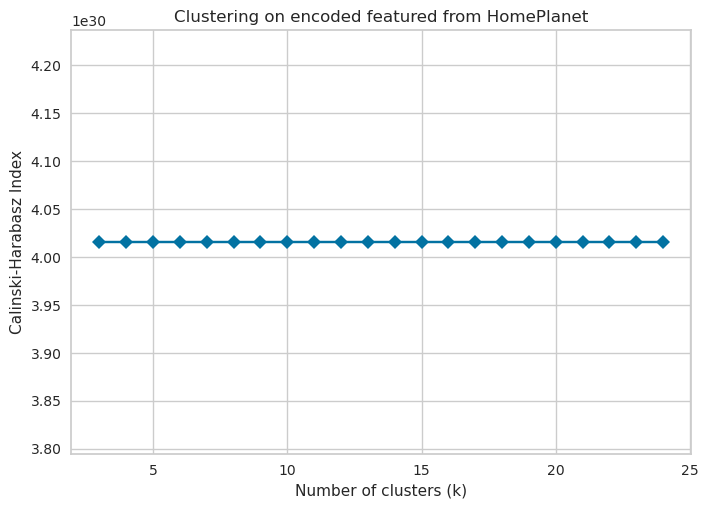

None
No clusters found for HomePlanet
+------------------------+--------------------+
|      New_feature       |   MAE(CV-TRAIN)    |
+------------------------+--------------------+
| HomePlanet_target_mean | 0.5921758455304722 |
| HomePlanet_count_label | 0.5865697097494419 |
+------------------------+--------------------+


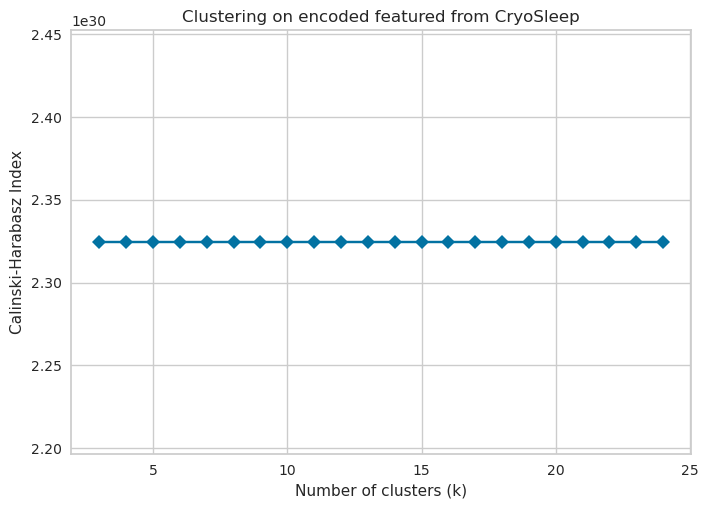

None
No clusters found for CryoSleep
+-----------------+--------------------+
|   New_feature   |   MAE(CV-TRAIN)    |
+-----------------+--------------------+
| CryoSleep_count | 0.7218806334242951 |
+-----------------+--------------------+


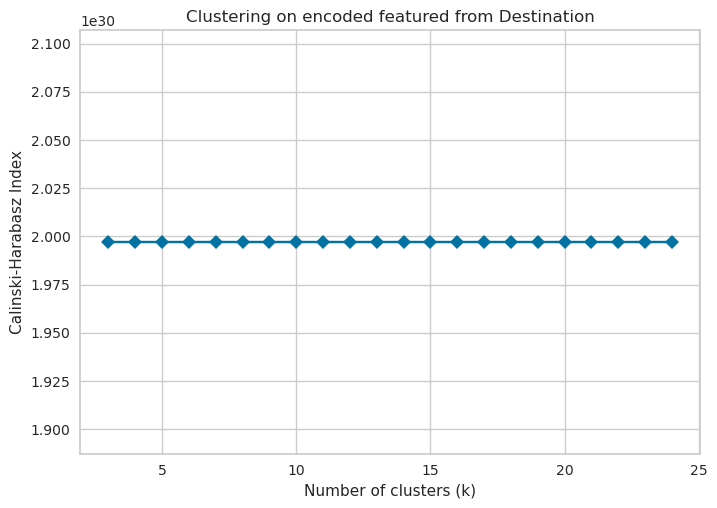

None
No clusters found for Destination
+-------------------------+-------------------+
|       New_feature       |   MAE(CV-TRAIN)   |
+-------------------------+-------------------+
| Destination_target_mean |  0.54702782601505 |
| Destination_count_label | 0.543865045894319 |
+-------------------------+-------------------+


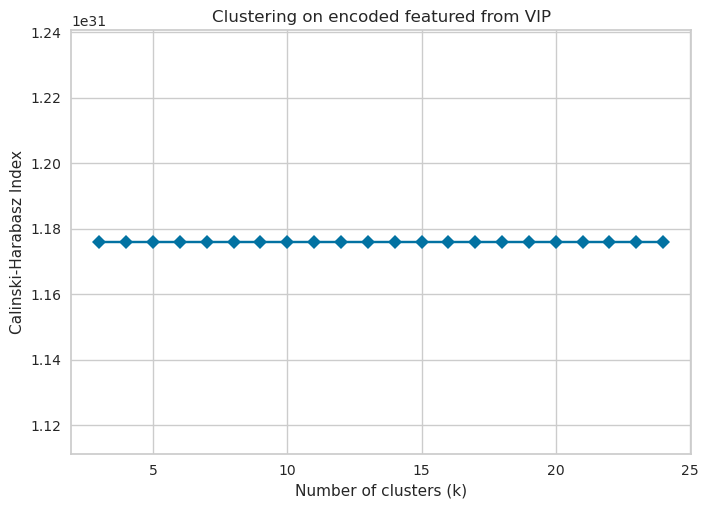

None
No clusters found for VIP
+-------------+--------------------+
| New_feature |   MAE(CV-TRAIN)    |
+-------------+--------------------+
|  VIP_count  | 0.5087734639874306 |
+-------------+--------------------+


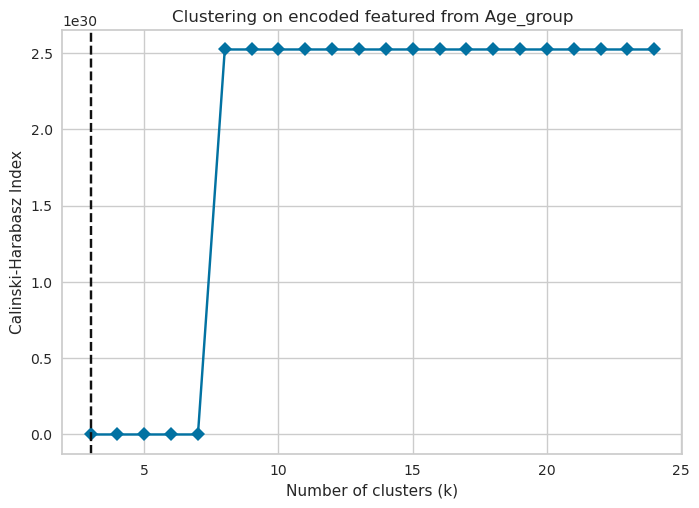

3
+-----------------------+--------------------+
|      New_feature      |   MAE(CV-TRAIN)    |
+-----------------------+--------------------+
| Age_group_target_mean | 0.5481716695609029 |
|    Age_group_count    | 0.5406968907632514 |
|   Age_group_cluster_  | 0.5323526006780782 |
+-----------------------+--------------------+


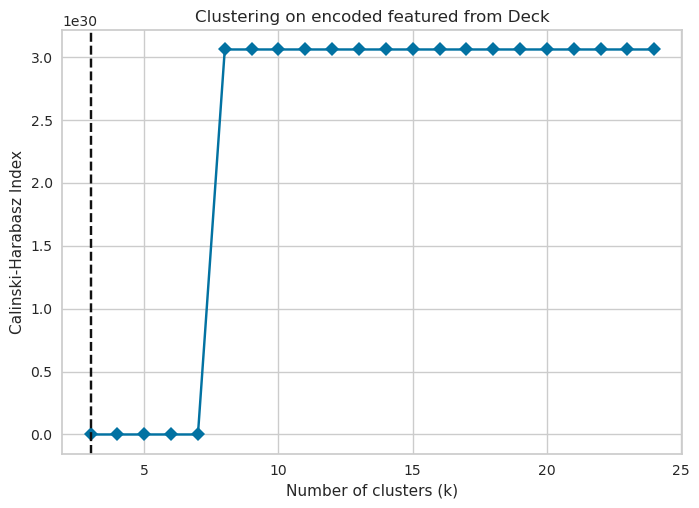

3
+------------------+--------------------+
|   New_feature    |   MAE(CV-TRAIN)    |
+------------------+--------------------+
| Deck_target_mean | 0.5829676258992806 |
|    Deck_ohe_1    | 0.5642768543785662 |
|    Deck_ohe_0    | 0.5398302737120648 |
+------------------+--------------------+


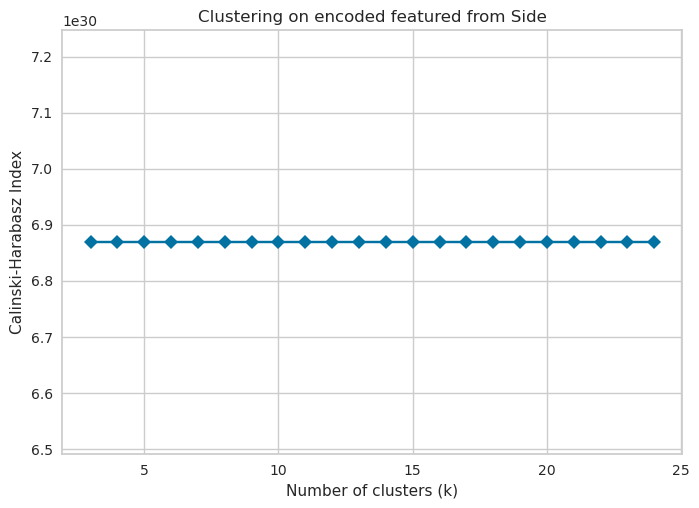

None
No clusters found for Side
+------------------+--------------------+
|   New_feature    |   MAE(CV-TRAIN)    |
+------------------+--------------------+
| Side_count_label | 0.5552234763913008 |
+------------------+--------------------+


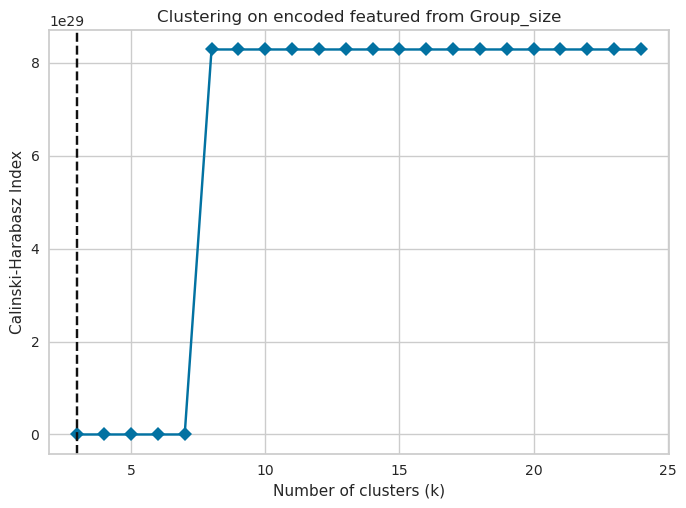

3
+------------------------+--------------------+
|      New_feature       |   MAE(CV-TRAIN)    |
+------------------------+--------------------+
| Group_size_target_mean | 0.5572316629455056 |
| Group_size_count_label | 0.555504837509303  |
|  Group_size_cluster_   | 0.5455776068800132 |
+------------------------+--------------------+


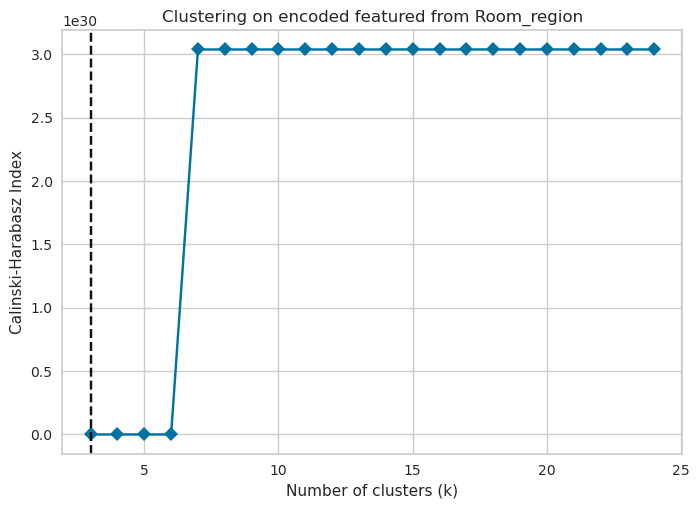

3
+-------------------------+--------------------+
|       New_feature       |   MAE(CV-TRAIN)    |
+-------------------------+--------------------+
|     Room_region_woe     | 0.5700332837178532 |
|    Room_region_ohe_1    | 0.5447267013975028 |
|    Room_region_ohe_2    | 0.5372463408583478 |
| Room_region_count_label | 0.534080459770115  |
+-------------------------+--------------------+


In [152]:

encode_category(data_cleaner)
data_cleaner, new_categorical_features = categorical_features_creation(data_cleaner, categorical_features)
data_cleaner = tfidf_transfrom(data_cleaner, 'Surname',1000,5)




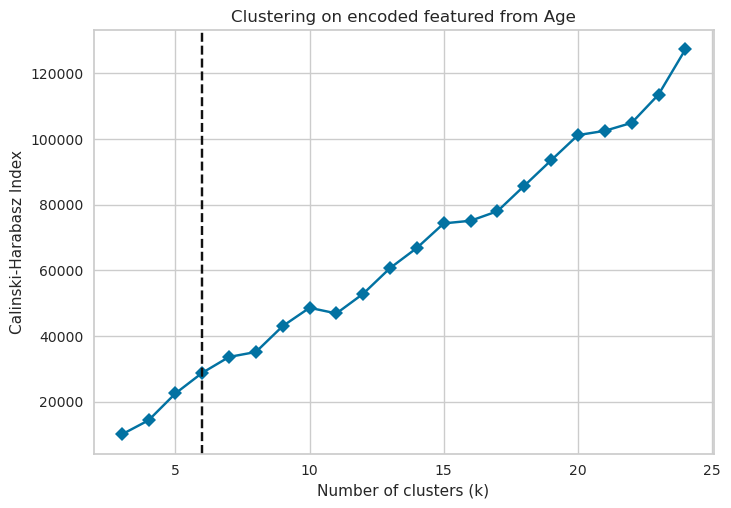

6


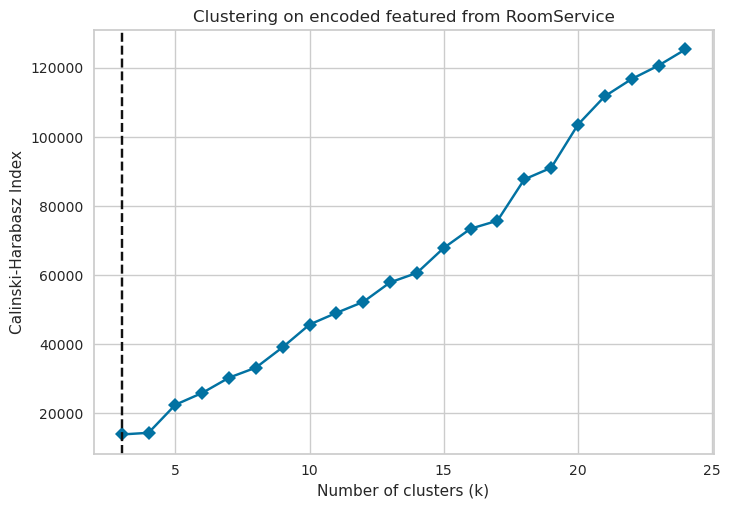

3


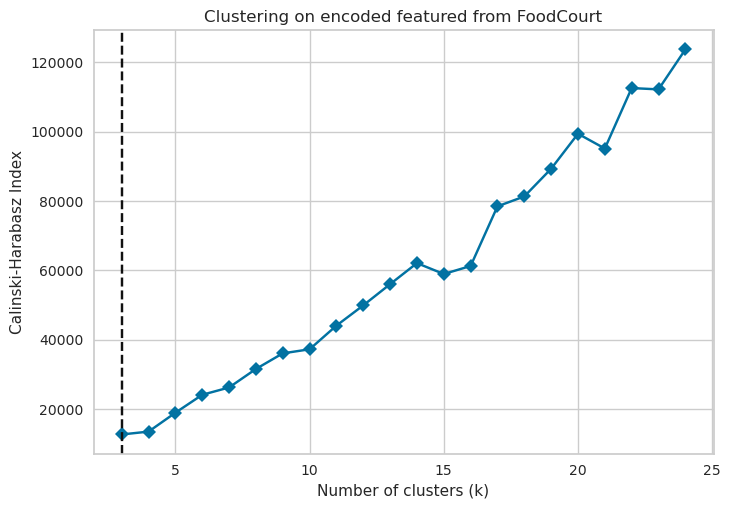

3


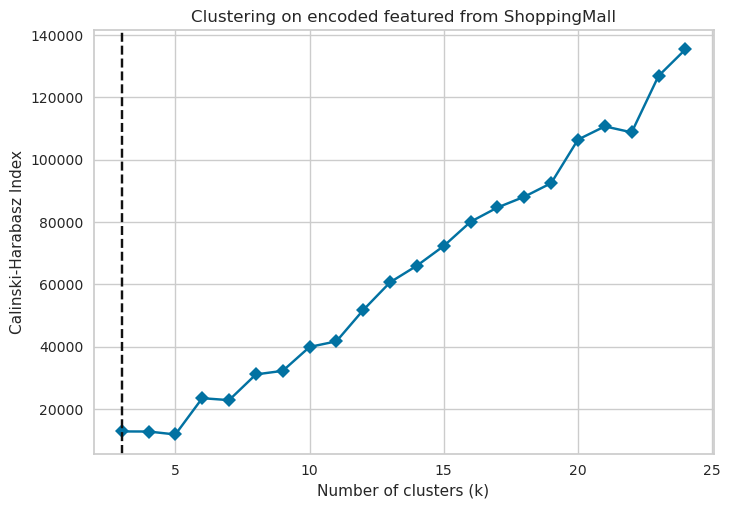

3


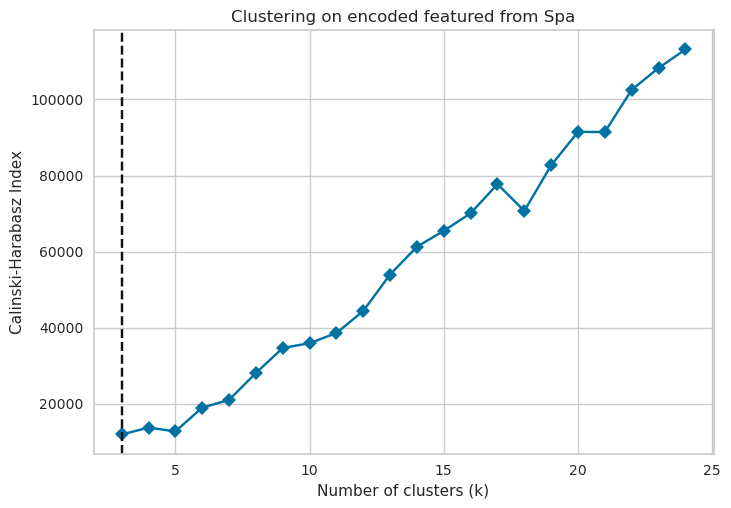

3


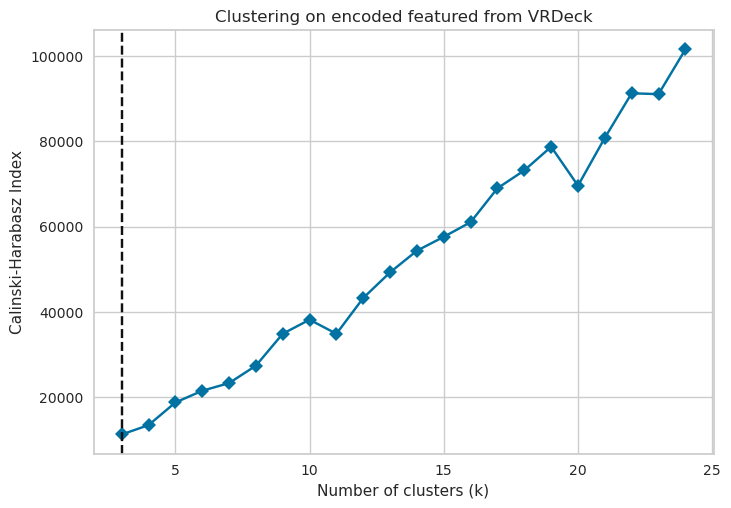

3


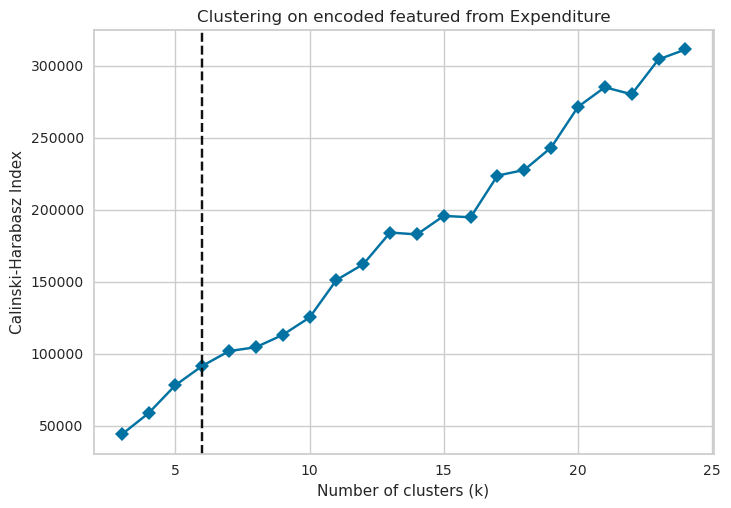

6


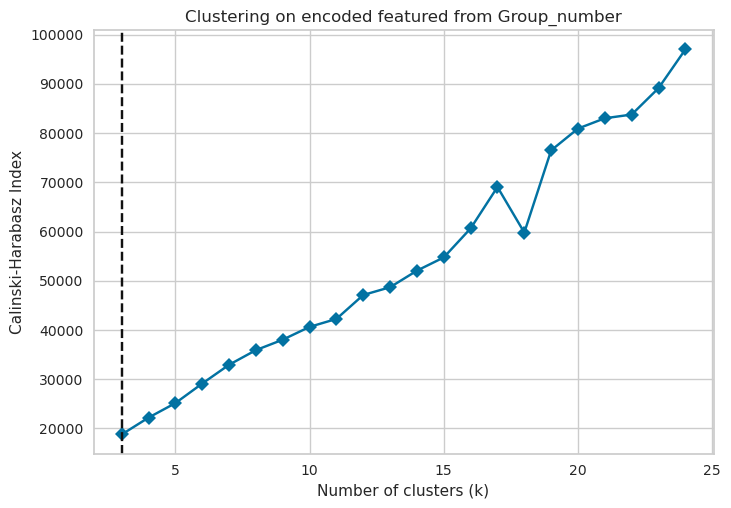

3


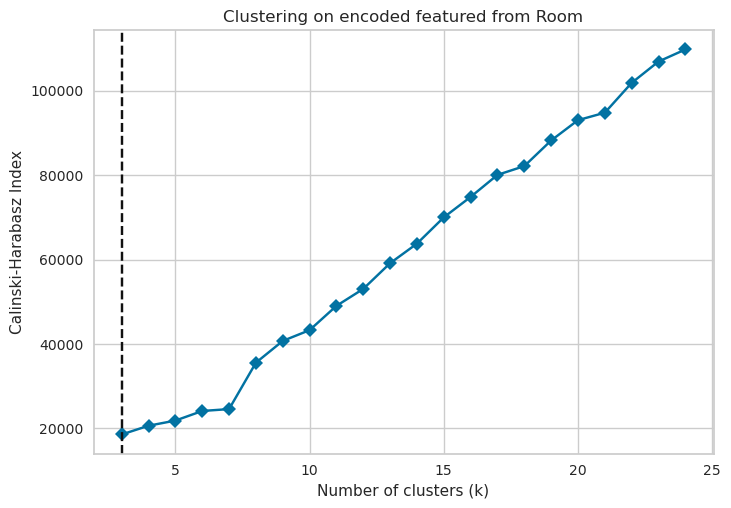

3
+----------------------------+--------------------+
|          Feature           |       CV-ACC       |
+----------------------------+--------------------+
|   Expenditure_yeojohnson   | 0.7369790374596873 |
|     Expenditure_pow035     | 0.7369790374596873 |
|   Expenditure_log_pow035   | 0.7369790374596873 |
|     Expenditure_pow025     | 0.736835152567601  |
|     Expenditure_pow01      | 0.736835152567601  |
|   Expenditure_log_pow01    | 0.736835152567601  |
|  Expenditure_pca_combined  | 0.736835152567601  |
|      Expenditure_sqrt      | 0.7366912676755147 |
|     Expenditure_boxcox     | 0.7359728768709171 |
| Expenditure_cluster_mean_  | 0.7356851070867444 |
|      Expenditure_log       | 0.7343911767138013 |
|     Expenditure_ohe_1      | 0.7200016538493343 |
|         Spa_pow025         | 0.6699764326469858 |
|       Spa_log_pow01        | 0.6699764326469858 |
|         Spa_pow035         | 0.6699764326469858 |
|       Spa_log_pow035       | 0.6699764326469858 |
|         

In [153]:
data_cleaner, new_numeric_features, cv_results = numeric_woe(data_cleaner, numeric_features, 0.7)

In [154]:
# feature_created = [data.copy(deep=True) for data in data_cleaner]

In [155]:
# data_cleaner = [data.copy(deep=True) for data in feature_created]

In [156]:
import textwrap
unimportant_features = list(cv_results.index[cv_results.cv_acc < 0.6])
unimportant_features_str = textwrap.fill(str(unimportant_features), width=200)
print(unimportant_features_str)

['ShoppingMall_ohe_0', 'ShoppingMall_pca_combined', 'VRDeck_ohe_2', 'Spa_ohe_2', 'ShoppingMall_yeojohnson', 'VRDeck_ohe_1', 'ShoppingMall_ohe_2', 'ShoppingMall_ohe_1', 'FoodCourt_yeojohnson',
'FoodCourt_cluster_mean_', 'FoodCourt_cluster_', 'RoomService_ohe_2', 'Expenditure_ohe_2', 'FoodCourt_pca_combined', 'FoodCourt_ohe_0', 'FoodCourt_ohe_1', 'FoodCourt_ohe_2', 'Age_log', 'Age_pow035',
'Age_sqrt', 'Age_boxcox', 'Age_pow01', 'Age_log_pow035', 'Age_pow025', 'Age_yeojohnson', 'Age_pca_combined', 'Age_log_pow01', 'Expenditure_ohe_5', 'Expenditure_ohe_3', 'Room_sqrt',
'Room_pca_combined', 'Room_pow035', 'Room_pow025', 'Room_log_pow035', 'Room_boxcox', 'Room_log', 'Age_cluster_mean_', 'Room_yeojohnson', 'Room_pow01', 'Room_cluster_mean_', 'Group_number_boxcox',
'Group_number_log', 'Room_log_pow01', 'Room_cluster_', 'Group_number_pca_combined', 'Group_number_sqrt', 'Group_number_pow035', 'Group_number_pow025', 'FoodCourt_sqrt', 'Group_number_log_pow035',
'Room_ohe_0', 'Group_number_yeojohns

In [157]:
# unimportant_features = ['ShoppingMall_cluster_mean_', 'ShoppingMall_cluster_', 'ShoppingMall_ohe_0', 'Expenditure_ohe_2', 'Spa_ohe_2', 'FoodCourt_cluster_mean_', 'FoodCourt_yeojohnson', 'FoodCourt_cluster_', 'VRDeck_ohe_2',
# 'FoodCourt_ohe_0', 'FoodCourt_sqrt', 'RoomService_ohe_2', 'ShoppingMall_ohe_2', 'Expenditure_ohe_4', 'ShoppingMall_ohe_1', 'FoodCourt_ohe_1', 'Age_yeojohnson', 'Age_log_pow035', 'Age_pow025',
# 'Room_log', 'Age_sqrt', 'Age_log', 'Age_pca_combined', 'Age_boxcox', 'Age_pow035', 'Room_yeojohnson', 'Room_boxcox', 'Room_sqrt', 'Age_log_pow01', 'Expenditure_ohe_3', 'Age_pow01', 'Room_pow01',
# 'Room_log_pow035', 'Room_pow025', 'Room_log_pow01', 'Age_cluster_mean_', 'Room_pow035', 'Room_pca_combined', 'FoodCourt_ohe_2', 'FoodCourt_pca_combined', 'Room_cluster_mean_', 'Room_cluster_',
# 'Age_cluster_', 'Room_ohe_1', 'Expenditure_ohe_5', 'Age_ohe_0', 'Room_ohe_2', 'Age_ohe_1', 'Age_ohe_6', 'Group_number_yeojohnson', 'Age_ohe_2', 'Room_ohe_0', 'Group_number_pca_combined',
# 'Group_number_log_pow035', 'Group_number_pow025', 'Group_number_sqrt', 'FoodCourt_log', 'Age_ohe_5', 'Group_number_pow035', 'Group_number_log', 'Group_number_ohe_0', 'Age_ohe_4', 'Age_ohe_3',
# 'Group_number_cluster_', 'Group_number_log_pow01', 'Group_number_pow01', 'Group_number_ohe_1', 'Group_number_ohe_2', 'Group_number_boxcox', 'ShoppingMall_log', 'Group_number_cluster_mean_',
# 'FoodCourt_boxcox', 'ShoppingMall_boxcox']

In [158]:
data_cleaner, unimp_pca_features = pca_unimportant_cols(data_cleaner, numeric_features, unimportant_features)

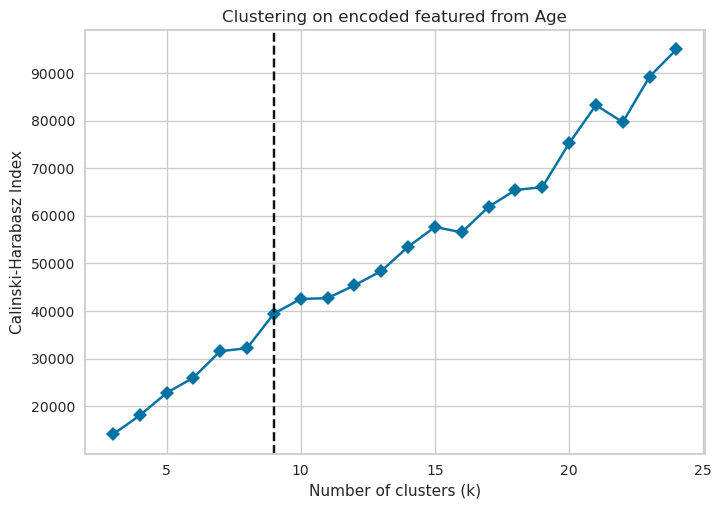

9
+------------------------+--------------------+
|      New_feature       |   MAE(CV-TRAIN)    |
+------------------------+--------------------+
| Age_cluster_mean_final | 0.5461562474158603 |
|          Age           | 0.5460119490614405 |
|   Age_cluster_final    | 0.5409805259240883 |
+------------------------+--------------------+


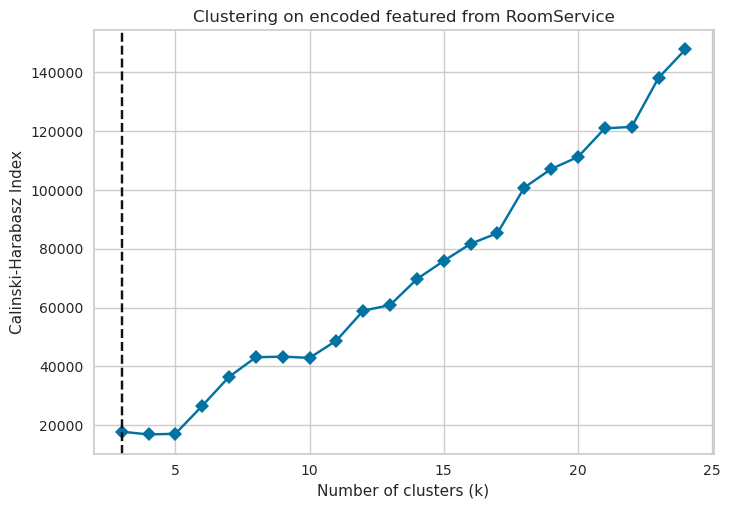

3
+------------------------+--------------------+
|      New_feature       |   MAE(CV-TRAIN)    |
+------------------------+--------------------+
| RoomService_log_pow01  | 0.668101587695361  |
| RoomService_yeojohnson | 0.6672386918051765 |
|      RoomService       | 0.6554467460514347 |
|   RoomService_ohe_0    | 0.6458091457868188 |
+------------------------+--------------------+


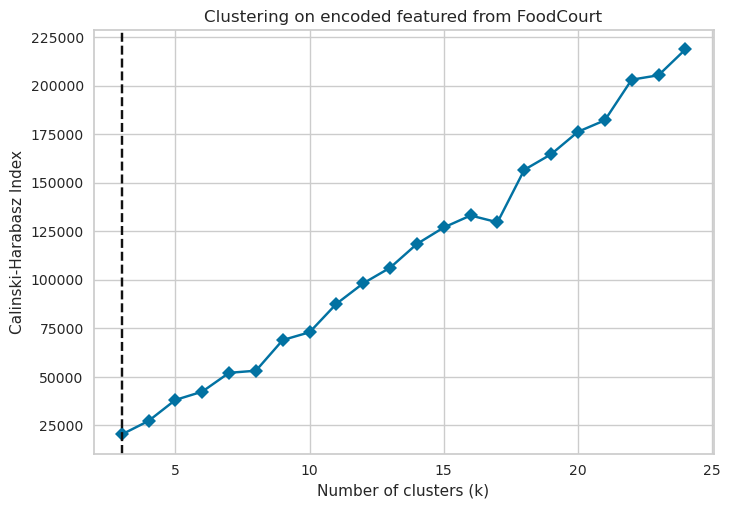

3
+---------------------+--------------------+
|     New_feature     |   MAE(CV-TRAIN)    |
+---------------------+--------------------+
| FoodCourt_log_pow01 | 0.6143132390639213 |
|      FoodCourt      | 0.5125113702141733 |
+---------------------+--------------------+


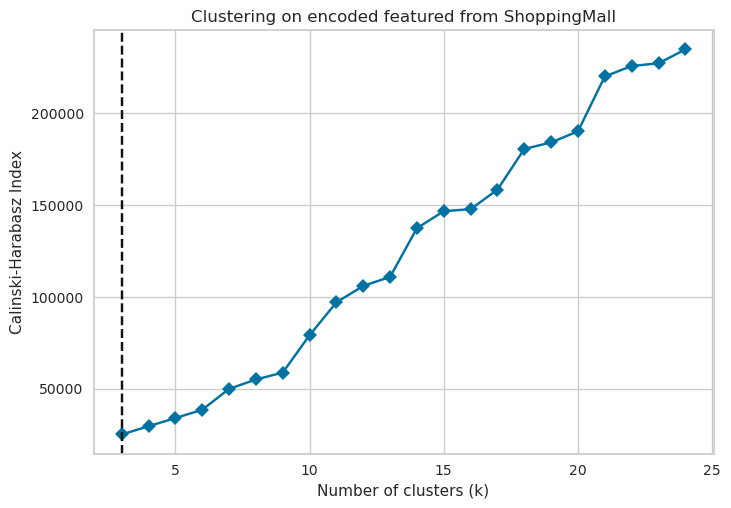

3
+---------------------------------+--------------------+
|           New_feature           |   MAE(CV-TRAIN)    |
+---------------------------------+--------------------+
| ShoppingMall_cluster_mean_final | 0.631572603985777  |
|     ShoppingMall_log_pow035     | 0.6312848342016043 |
+---------------------------------+--------------------+


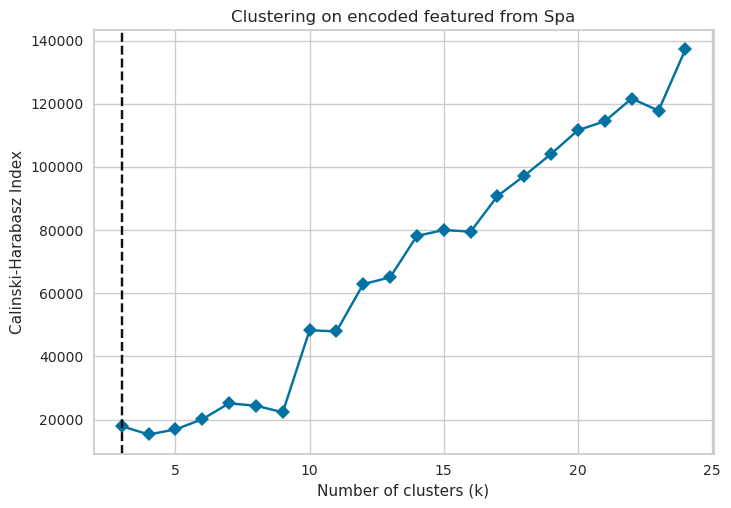

3
+----------------+--------------------+
|  New_feature   |   MAE(CV-TRAIN)    |
+----------------+--------------------+
| Spa_log_pow035 | 0.6699764326469858 |
|   Spa_ohe_1    | 0.6136078723228314 |
+----------------+--------------------+


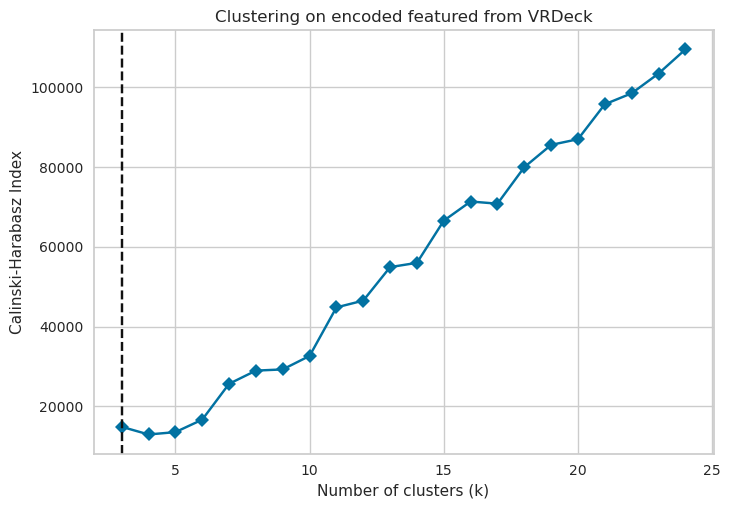

3
+-----------------+--------------------+
|   New_feature   |   MAE(CV-TRAIN)    |
+-----------------+--------------------+
|  VRDeck_pow025  | 0.6647934755643761 |
|      VRDeck     | 0.6540081038617382 |
| VRDeck_cluster_ | 0.6268268833209294 |
+-----------------+--------------------+


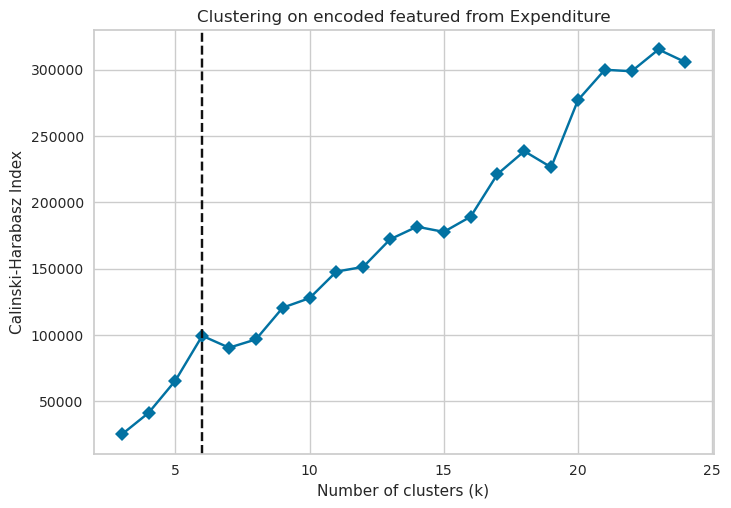

6
+----------------------+--------------------+
|     New_feature      |   MAE(CV-TRAIN)    |
+----------------------+--------------------+
|  Expenditure_pow035  | 0.7369790374596873 |
| Expenditure_cluster_ | 0.6973019515422145 |
|  Expenditure_ohe_0   | 0.6068700901347887 |
+----------------------+--------------------+


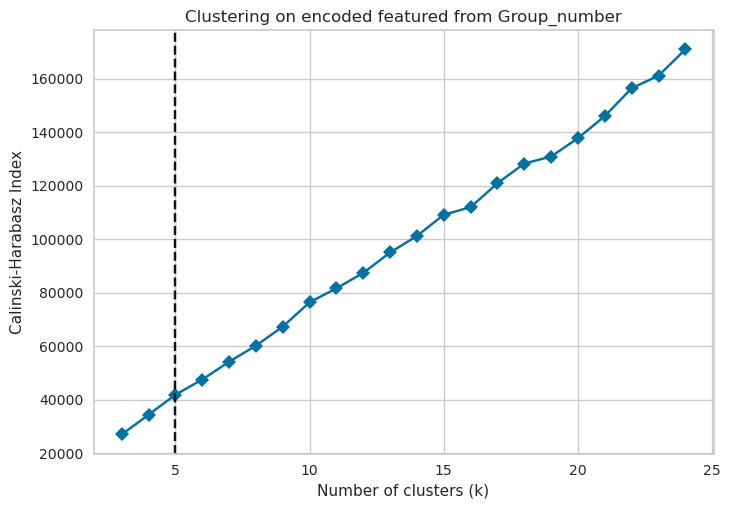

5
+----------------------------+--------------------+
|        New_feature         |   MAE(CV-TRAIN)    |
+----------------------------+--------------------+
| Group_number_cluster_final | 0.5427069378979575 |
|        Group_number        | 0.5294726287935168 |
+----------------------------+--------------------+


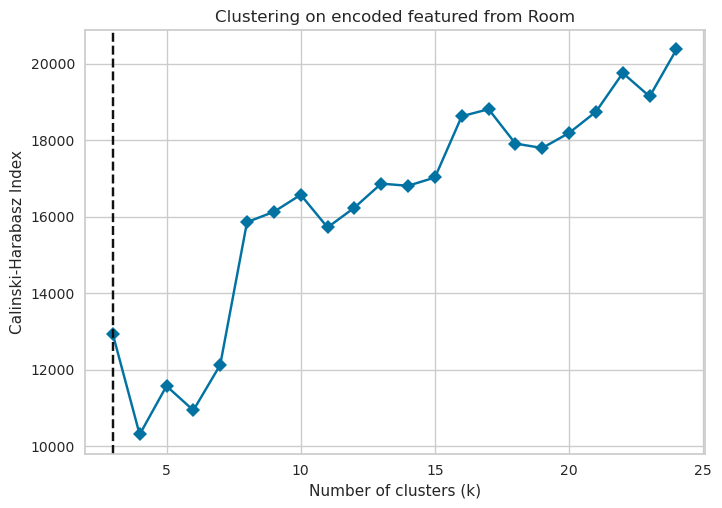

3
+------------------------+--------------------+
|      New_feature       |   MAE(CV-TRAIN)    |
+------------------------+--------------------+
| RoomService_log_pow01  | 0.668101587695361  |
| RoomService_yeojohnson | 0.6676703464814355 |
|      RoomService       | 0.6554467460514347 |
|   RoomService_ohe_0    | 0.551476680724386  |
|          Room          | 0.5366712147523359 |
+------------------------+--------------------+
+--------------+---------------------------------+--------------------+
|     Base     |             Feature             |       CV-ACC       |
+--------------+---------------------------------+--------------------+
|     Age      |      Age_cluster_mean_final     | 0.5461562474158603 |
| RoomService  |      RoomService_log_pow01      | 0.668101587695361  |
|  FoodCourt   |       FoodCourt_log_pow01       | 0.6143132390639213 |
| ShoppingMall | ShoppingMall_cluster_mean_final | 0.631572603985777  |
|     Spa      |          Spa_log_pow035         | 0.669976432

In [159]:

data_cleaner = pick_most_important_features(data_cleaner, numeric_features, numeric_features + new_numeric_features)

In [174]:
data_cleaner[0]

PassengerId  HomePlanet  CryoSleep  Destination   Age  VIP  RoomService  \
0        0001_01         1.0          0          2.0  39.0    0          0.0   
1        0002_01         0.0          0          2.0  24.0    0        109.0   
2        0003_01         1.0          0          2.0  58.0    1         43.0   
3        0003_02         1.0          0          2.0  33.0    0          0.0   
4        0004_01         0.0          0          2.0  16.0    0        303.0   
...          ...         ...        ...          ...   ...  ...          ...   
6949     9275_03         1.0          0          2.0  30.0    0          0.0   
6950     9276_01         1.0          0          0.0  41.0    1          0.0   
6951     9278_01         0.0          1          1.0  18.0    0          0.0   
6952     9279_01         0.0          0          2.0  26.0    0          0.0   
6953     9280_02         1.0          0          2.0  44.0    0        126.0   

      FoodCourt  VRDeck  Transported  Age_group  No_spending  Group_number  \
0           0.0     0.0        False        5.0            1             1   
1           9.0    44.0         True        2.0            0             2   
2        3576.0    49.0        False        6.0            0             3   
3        1283.0   193.0        False        3.0            0             3   
4          70.0     2.0         True        1.0            0             4   
...         ...     ...          ...        ...          ...           ...   
6949     3208.0   330.0         True        3.0            0          9275   
6950     6819.0    74.0        False        6.0            0          9276   
6951        0.0     0.0        False        2.0            1          9278   
6952        0.0     0.0         True        2.0            0          9279   
6953     4688.0    12.0         True        6.0            0          9280   

      Group_size  Passanger_number  Solo  Group2_3_4  Deck    Room  Side  \
0              1                 1   1.0         0.0   1.0     0.0   0.0   
1              1                 1   1.0         0.0   5.0     0.0   1.0   
2              2                 1   0.0         1.0   0.0     0.0   1.0   
3              2                 2   0.0         1.0   0.0     0.0   1.0   
4              1                 1   1.0         0.0   5.0     1.0   1.0   
...          ...               ...   ...         ...   ...     ...   ...   
6949           3                 3   0.0         1.0   0.0    97.0   0.0   
6950           1                 1   1.0         0.0   0.0    98.0   0.0   
6951           1                 1   1.0         0.0   6.0  1499.0   1.0   
6952           1                 1   1.0         0.0   6.0  1500.0   1.0   
6953           2                 2   0.0         1.0   4.0   608.0   1.0   

      Room_region1  Room_region2  Room_region3  Room_region4  Room_region5  \
0                1             0             0             0             0   
1                1             0             0             0             0   
2                1             0             0             0             0   
3                1             0             0             0             0   
4                1             0             0             0             0   
...            ...           ...           ...           ...           ...   
6949             1             0             0             0             0   
6950             1             0             0             0             0   
6951             0             0             0             0             0   
6952             0             0             0             0             0   
6953             0             0             0             1             0   

      Room_region6  Room_region7  Room_region  Surname_size  Family_size  \
0                0             0          1.0             1            1   
1                0             0          1.0             4            1   
2                0           

<Axes: >

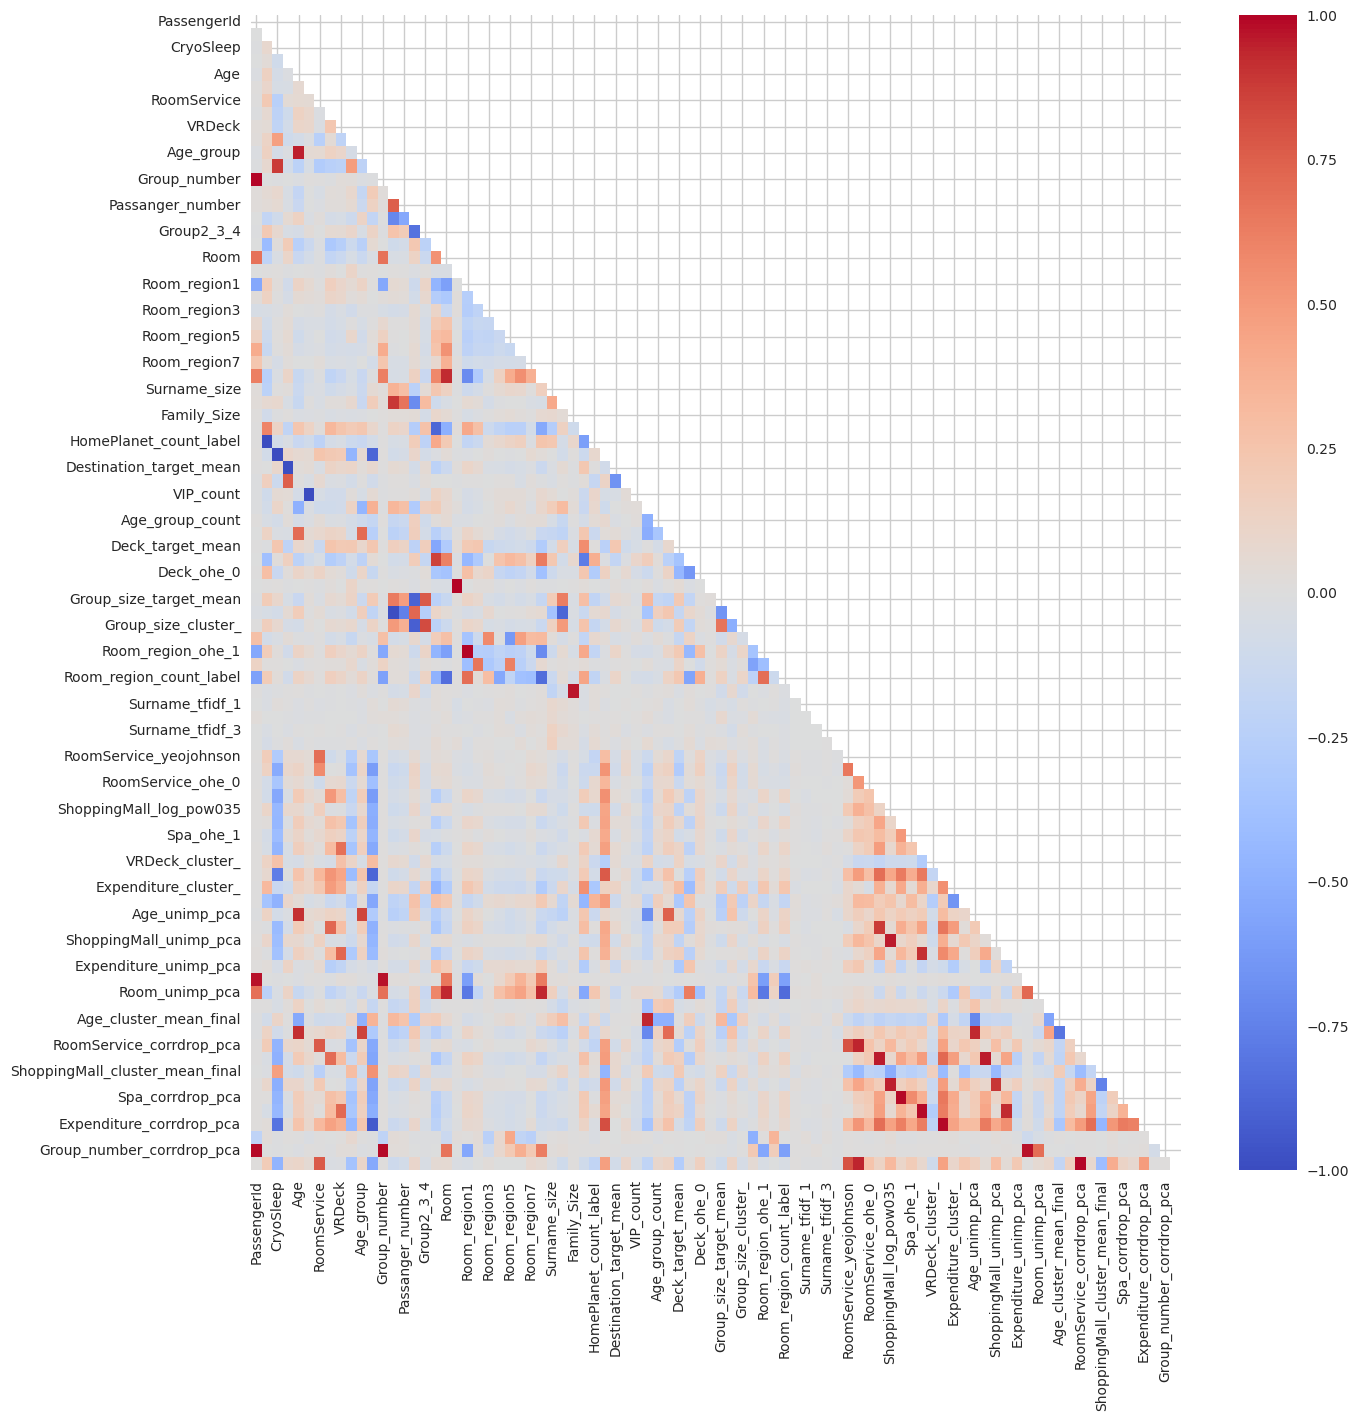

In [161]:

plt.figure(figsize=(15,15))
correlation = data_cleaner[0].corr()
mask = np.triu(correlation, )
sns.heatmap(correlation, cmap='coolwarm', mask = mask, )

In [162]:
import textwrap

REMOVE = ['PassengerId']
features = list(set(data_cleaner[0].columns) - set([TARGET]) - set(REMOVE))
wrapped_list = textwrap.fill(str(features), width=150)
print(wrapped_list)

TRAIN_SET = list(set(features ) -set(REMOVE)) 

['Group_size_count_label', 'Age_cluster_mean_final', 'HomePlanet', 'Deck', 'ShoppingMall_log_pow035', 'VRDeck_pow025', 'Room_region6', 'Family_Size',
'Room_region3', 'Expenditure_corrdrop_pca', 'Group2_3_4', 'No_spending', 'Family_size', 'Age_group', 'Destination_target_mean',
'Group_size_target_mean', 'Side_count_label', 'Room_corrdrop_pca', 'Passanger_number', 'CryoSleep', 'RoomService_ohe_0', 'Age_group_target_mean',
'Room_region_count_label', 'Expenditure_unimp_pca', 'Room_unimp_pca', 'Age_corrdrop_pca', 'Deck_target_mean', 'Room_region1', 'VRDeck_unimp_pca',
'Room_region', 'FoodCourt_log_pow01', 'Room', 'Group_number_cluster_final', 'RoomService_corrdrop_pca', 'ShoppingMall_corrdrop_pca', 'VIP',
'Room_region2', 'VRDeck_cluster_', 'Solo', 'Age_unimp_pca', 'Group_size_cluster_', 'Destination', 'VRDeck', 'Room_region_woe', 'Group_number',
'Deck_ohe_1', 'VRDeck_corrdrop_pca', 'Group_number_unimp_pca', 'Surname_tfidf_3', 'Deck_ohe_0', 'Surname_tfidf_0', 'RoomService', 'Age_group_count'

In [163]:
# TRAIN_08177 = ['Age_cluster_mean_final', 'HomePlanet', 'Deck', 'ShoppingMall_log_pow035', 'VRDeck_pow025', 'Room_region6', 'Family_Size', 'Room_region3',
# 'Expenditure_corrdrop_pca', 'Group2_3_4', 'No_spending', 'Family_size', 'Side_count', 'Room_region_cluster_mean_', 'Age_group',
# 'Destination_target_mean', 'Group_size_target_mean', 'ShoppingMall_cluster_final', 'Room_corrdrop_pca', 'Passanger_number', 'CryoSleep',
# 'Expenditure_pow025', 'Expenditure_unimp_pca', 'Room_unimp_pca', 'Age_corrdrop_pca', 'Deck_target_mean', 'Age_group_ohe_2', 'Room_region1',
# 'Room_region_cluster_', 'Room_region', 'FoodCourt_log_pow01', 'Room', 'Group_number_cluster_final', 'RoomService_corrdrop_pca',
# 'ShoppingMall_corrdrop_pca', 'VIP', 'Room_region2', 'VRDeck_cluster_', 'VRDeck_cluster_final', 'Solo', 'FoodCourt_cluster_final', 'Group_size_ohe_2',
# 'Age_unimp_pca', 'Age_final_pca', 'Room_region_target_mean', 'Destination', 'VRDeck', 'Group_number', 'Deck_ohe_2', 'VRDeck_corrdrop_pca',
# 'Group_number_unimp_pca', 'Surname_tfidf_3', 'Surname_tfidf_0', 'HomePlanet_ohe_1', 'Age_group_count', 'Room_region7', 'Spa_cluster_final',
# 'FoodCourt', 'Surname_size', 'Spa_corrdrop_pca', 'Surname_tfidf_2', 'Expenditure_ohe_0', 'RoomService_final_pca', 'ShoppingMall_unimp_pca',
# 'HomePlanet_ohe_2', 'RoomService_cluster_', 'Surname_tfidf_4', 'Destination_count_label', 'VIP_count', 'Group_number_cluster_mean_final',
# 'Room_region5', 'CryoSleep_count', 'FoodCourt_unimp_pca', 'ShoppingMall_cluster_mean_final', 'HomePlanet_count', 'Room_region_count', 'Age_group_woe',
# 'Expenditure_cluster_', 'Expenditure_cluster_final', 'FoodCourt_corrdrop_pca', 'Age_cluster_final', 'Side', 'Surname_tfidf_1', 'Deck_count_label',
# 'Group_size', 'Group_number_corrdrop_pca', 'Spa_pow035', 'Room_region4']

In [164]:
data_cleaner[0][TRAIN_SET]


Group_size_count_label  Age_cluster_mean_final  HomePlanet  Deck  \
0                          7                0.398099         1.0   1.0   
1                          7                0.397116         0.0   5.0   
2                          6                0.394101         1.0   0.0   
3                          6                0.384316         1.0   0.0   
4                          7                0.452108         0.0   5.0   
...                      ...                     ...         ...   ...   
6949                       5                0.384316         1.0   0.0   
6950                       7                0.398099         1.0   0.0   
6951                       7                0.374377         0.0   6.0   
6952                       7                0.397116         0.0   6.0   
6953                       6                0.398099         1.0   4.0   

      ShoppingMall_log_pow035  VRDeck_pow025  Room_region6  Family_Size  \
0                    0.000000       0.000000             0            1   
1                    0.087175       0.206638             0            4   
2                    0.000000       0.212274             0            6   
3                    0.210367       0.299045             0            6   
4                    0.157799       0.095412             0            6   
...                       ...            ...           ...          ...   
6949                 0.000000       0.341960             0            4   
6950                 0.000000       0.235318             0            3   
6951                 0.000000       0.000000             1            2   
6952                 0.345402       0.000000             0            6   
6953                 0.000000       0.149328             0            6   

      Room_region3  Expenditure_corrdrop_pca  Group2_3_4  No_spending  \
0                0                 -4.115935         0.0            1   
1                0                  1.739048         0.0            0   
2                0                  7.297424         1.0            0   
3                0                  5.344350         1.0            0   
4                0                  2.209531         0.0            0   
...            ...                       ...         ...          ...   
6949             0                  4.547407         1.0            0   
6950             0                  6.718448         0.0            0   
6951             0                 -4.115935         0.0            1   
6952             0                  2.872728         0.0            0   
6953             0                  5.189046         1.0            0   

      Family_size  Age_group  Destination_target_mean  Group_size_target_mean  \
0               1        5.0                 0.471086                0.453614   
1               1        2.0                 0.471086                0.453614   
2               2        6.0                 0.471086                0.538690   
3               2        3.0                 0.471086                0.538690   
4               1        1.0                 0.471086                0.453614   
...           ...        ...                      ...                     ...   
6949            3        3.0                 0.471086                0.592593   
6950            1        6.0                 0.606513                0.453614   
6951            1        2.0                 0.512539                0.453614   
6952            1        2.0                 0.471086                0.453614   
6953            2        6.0                 0.471086                0.538690   

      Side_count_label  Room_corrdrop_pca  Passanger_number  CryoSleep  \
0                    0          -2.363697                 1          0   
1                    1           2.606035                 1          0   
2                    1           1.830989                 1          0   
3                    1          -2.363697                 2          0

Exploratory Analysis

In [165]:

# for col in ['No_spending','CryoSleep','Solo','HomePlanet','Destination','Age_group','Deck']:
#         print(data_cleaner[0][[col,TARGET]].groupby(col, as_index=False).mean())

#         print('-'*10, '\n')

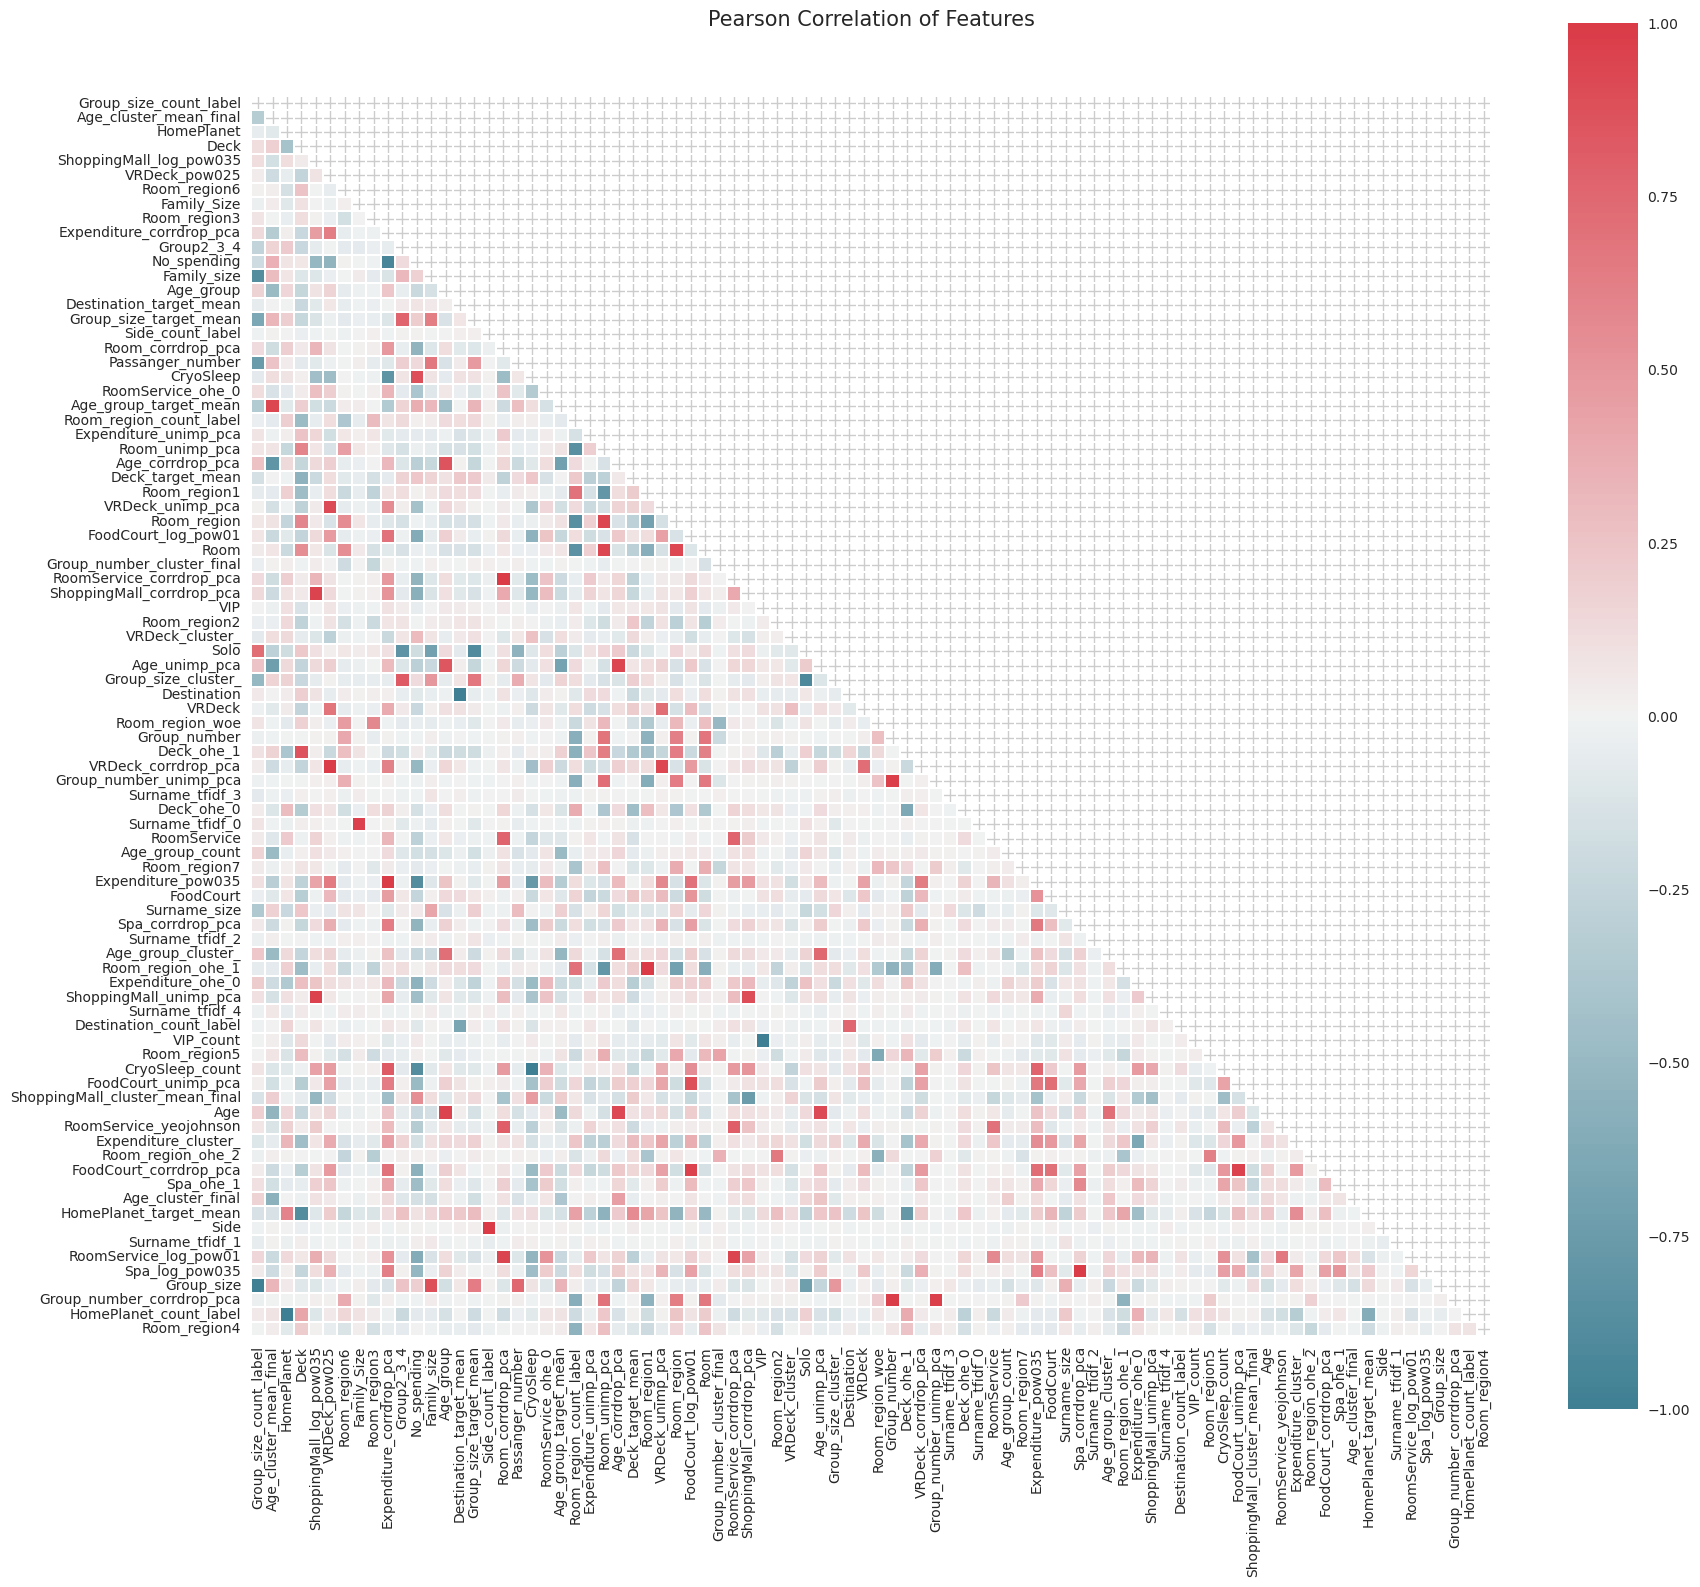

In [166]:

def correlation_heatmap(dataf):
    corr_matrix = dataf.corr()
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    _, ax = plt.subplots(figsize=(20, 20))
    colormap = sns.diverging_palette(220, 10, as_cmap=True)
    _ = sns.heatmap(
        corr_matrix,
        mask = mask,
        cmap = colormap,
        square=True,
        cbar_kws={'shrink':.9 },
        ax=ax,
        # annot=True,
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':5 }
        
    )

    plt.title('Pearson Correlation of Features', y=1.05, size=15)
    plt.show()

correlation_heatmap(data_cleaner[0][TRAIN_SET])

MODELING

In [167]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [168]:
xgb_params={'colsample_bytree': 0.8498791800104656, 'learning_rate': 0.020233442882782587, 'max_depth': 4, 'n_estimators': 469, 'subsample': 0.746529796772373}
lgb_params={'colsample_bytree': 0.7774799983649324, 'learning_rate': 0.007653648135411494, 'max_depth': 5, 'n_estimators': 350, 'reg_alpha': 0.14326300616140863, 'reg_lambda': 0.9310129332502252, 'subsample': 0.6189257947519665}
cat_params={'random_strength': 0.1, 'one_hot_max_size': 10, 'max_bin': 100, 'learning_rate': 0.01, 'l2_leaf_reg': 0.5, 'grow_policy': 'Lossguide', 'depth': 5, 'bootstrap_type': 'Bernoulli'}

In [169]:
trainX, trainY, testX, testY = data_cleaner[0][TRAIN_SET], data_cleaner[0][TARGET], data_cleaner[1][TRAIN_SET], data_cleaner[1][TARGET]

In [170]:
xgb = XGBClassifier(**xgb_params)
lgb = LGBMClassifier(**lgb_params)
cat = CatBoostClassifier(**cat_params)

In [171]:
from sklearn.ensemble import VotingClassifier
vc = VotingClassifier([('xgb',xgb),('lgb', lgb), ('cat',cat)], voting='soft').fit(trainX, trainY)


[LightGBM] [Info] Number of positive: 3502, number of negative: 3452
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001328 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7888
[LightGBM] [Info] Number of data points in the train set: 6954, number of used features: 86
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503595 -> initscore=0.014380
[LightGBM] [Info] Start training from score 0.014380
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

In [175]:
vc.score(testX, testY)

0.7912593444508338

In [ ]:
pd.DataFrame().columns.intersection

In [ ]:
ACC = []
for i in range(10): 
	data_cleaner = [pd.read_csv('imputed_train.csv'), pd.read_csv('imputed_test.csv')]
	from sklearn.model_selection import train_test_split
	val = data_cleaner[0].sample(frac=0.2, replace=False)
	submition_cleaner = [ data_cleaner[0].copy(deep=True), data_cleaner[1].copy(deep=True)]
	data_cleaner = [data_cleaner[0].loc[~data_cleaner[0].index.isin(val.index)].reset_index(drop=True), val.reset_index(drop=True)]

	encode_category(data_cleaner)
	data_cleaner, new_categorical_features = categorical_features_creation(data_cleaner, categorical_features)
	data_cleaner = tfidf_transfrom(data_cleaner, 'Surname',1000,5)
	data_cleaner, new_numeric_features, cv_results = numeric_woe(data_cleaner, numeric_features, 0.7)
	import textwrap
	unimportant_features = list(data_cleaner[0].columns.intersection(cv_results.index[cv_results.cv_acc < 0.6]))
	unimportant_features_str = textwrap.fill(str(unimportant_features), width=200)
	print(unimportant_features_str)
	data_cleaner, unimp_pca_features = pca_unimportant_cols(data_cleaner, numeric_features, unimportant_features)

	data_cleaner = pick_most_important_features(data_cleaner, numeric_features, numeric_features + new_numeric_features)
	import textwrap

	REMOVE = ['PassengerId']
	features = list(set(data_cleaner[0].columns) - set([TARGET]) - set(REMOVE))
	wrapped_list = textwrap.fill(str(features), width=150)
	print(wrapped_list)

	TRAIN_SET = list(set(features ) -set(REMOVE)) 
	trainX, trainY, testX, testY = data_cleaner[0][TRAIN_SET], data_cleaner[0][TARGET], data_cleaner[1][TRAIN_SET], data_cleaner[1][TARGET]
	from sklearn.ensemble import VotingClassifier
	vc = VotingClassifier([('xgb',xgb),('lgb', lgb), ('cat',cat)], voting='soft').fit(trainX, trainY)
	print(vc.score(testX, testY))
	ACC.append(vc.score(testX, testY))

In [ ]:
# [0.7924094307073031,
#  0.8021851638872916,
#  0.8113858539390454,
#  0.7952846463484762,
#  0.8113858539390454,
#  0.8200115008625647,
#  0.8171362852213916,
#  0.8251868890166763,
#  0.7901092581943646,
#  0.7993099482461185]

In [ ]:
# 0.8104875804967802 local to 0.803 leaderboard
# 0.8056 only unimpor removed pca added 




In [ ]:
submition_cleaner = [pd.read_csv('imputed_train.csv'), pd.read_csv('imputed_test.csv')]

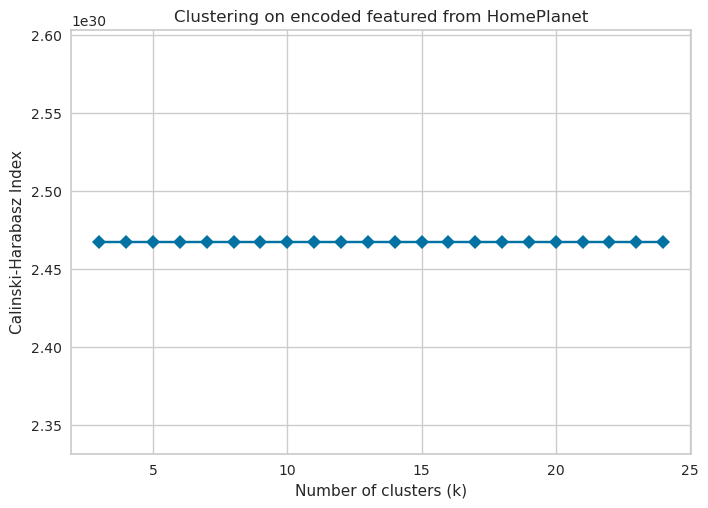

None
No clusters found for HomePlanet


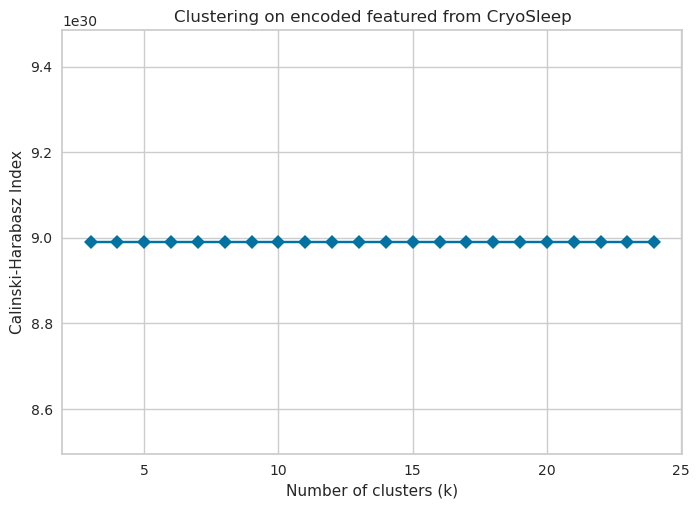

None
No clusters found for CryoSleep


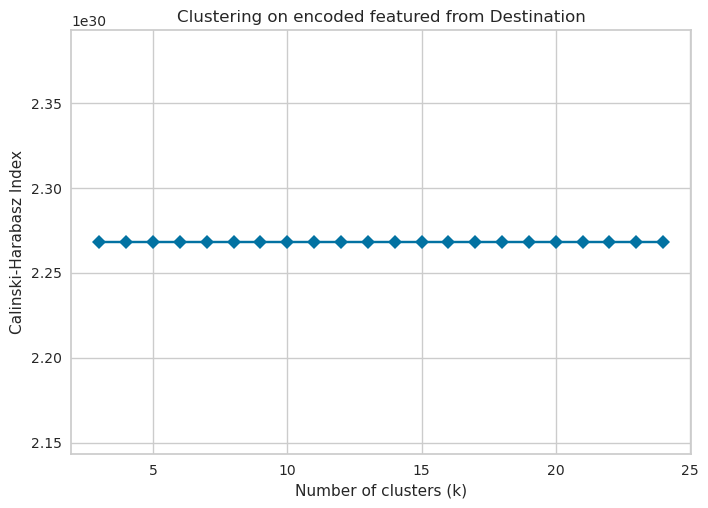

None
No clusters found for Destination


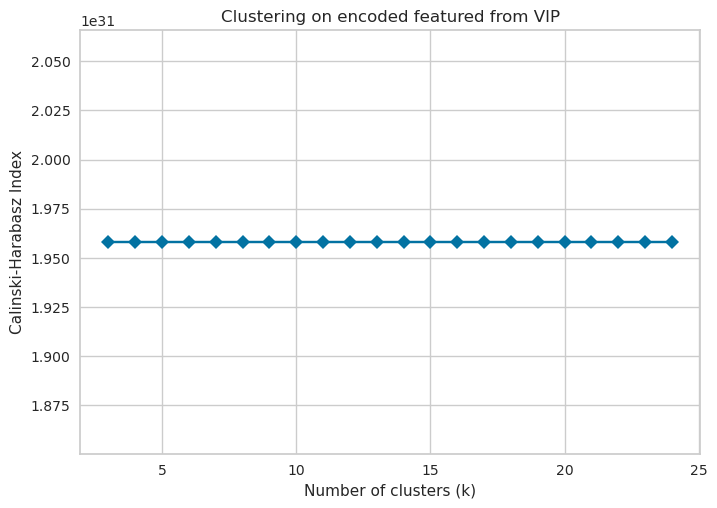

None
No clusters found for VIP


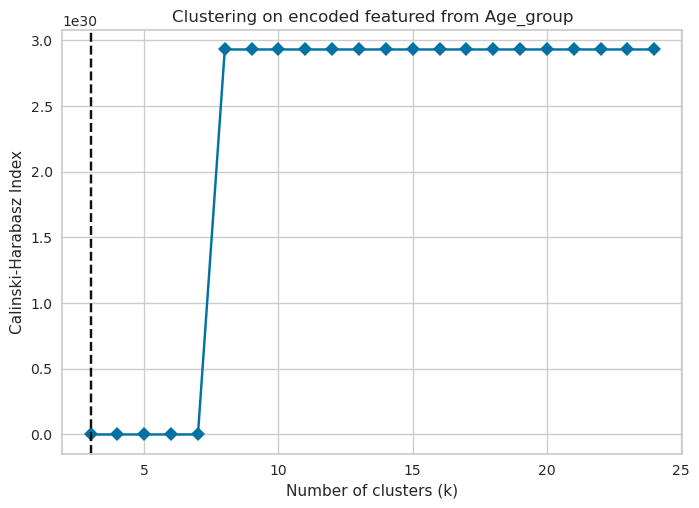

3


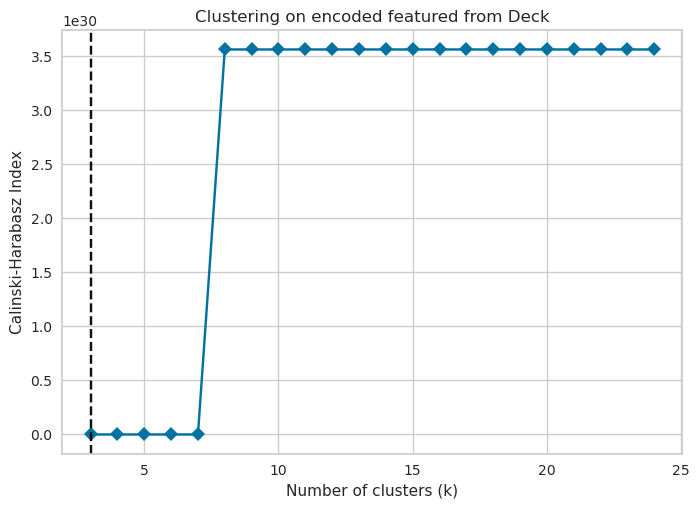

3


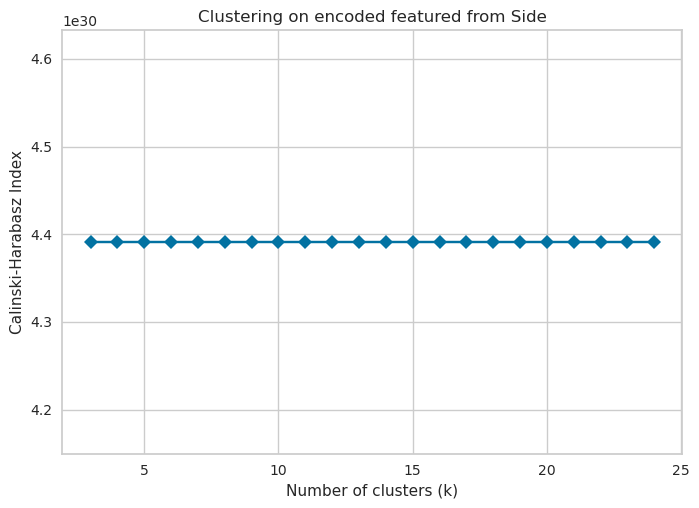

None
No clusters found for Side


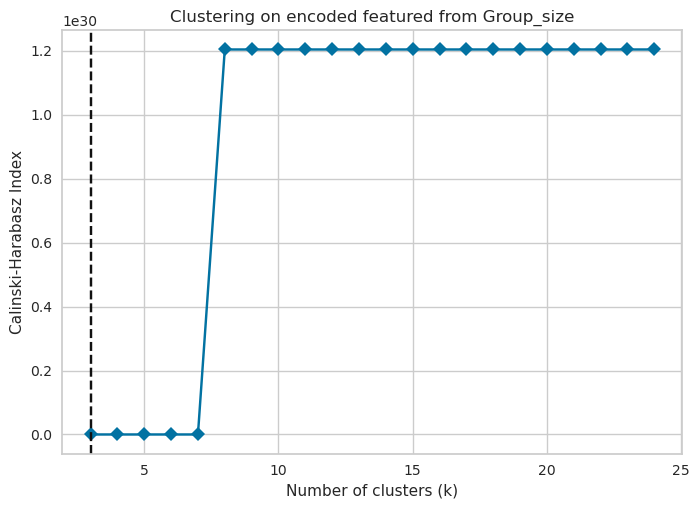

3


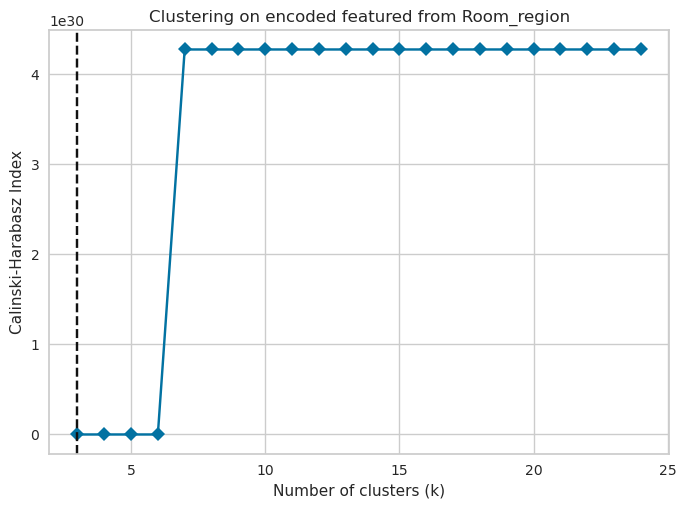

3


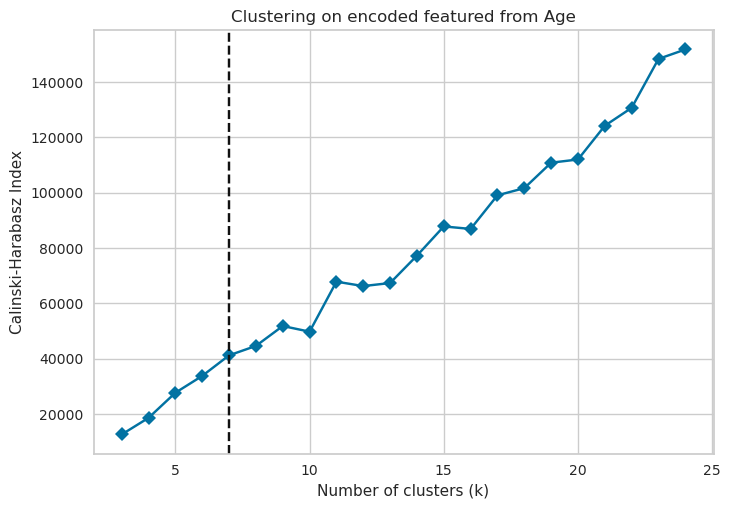

7


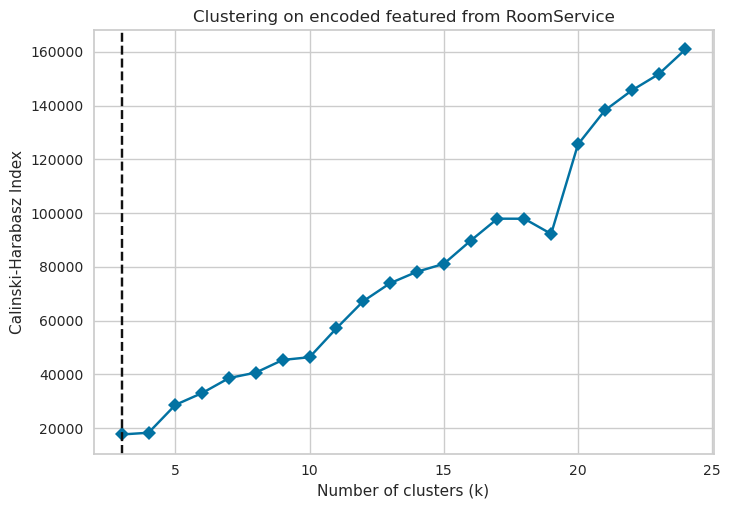

3


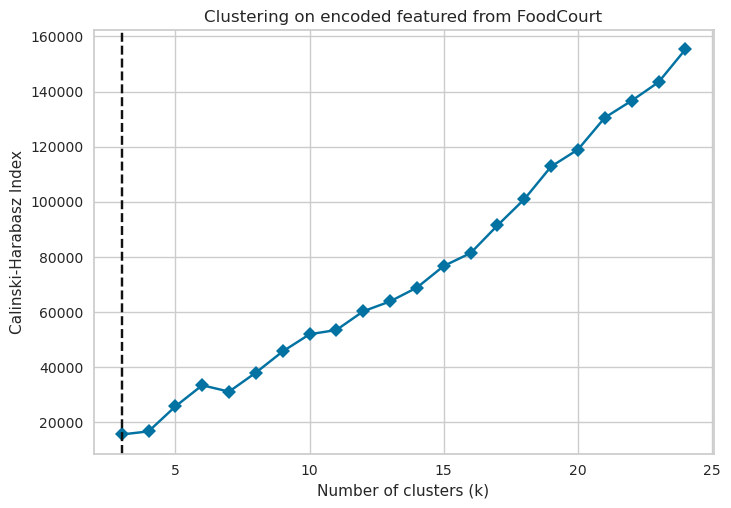

3


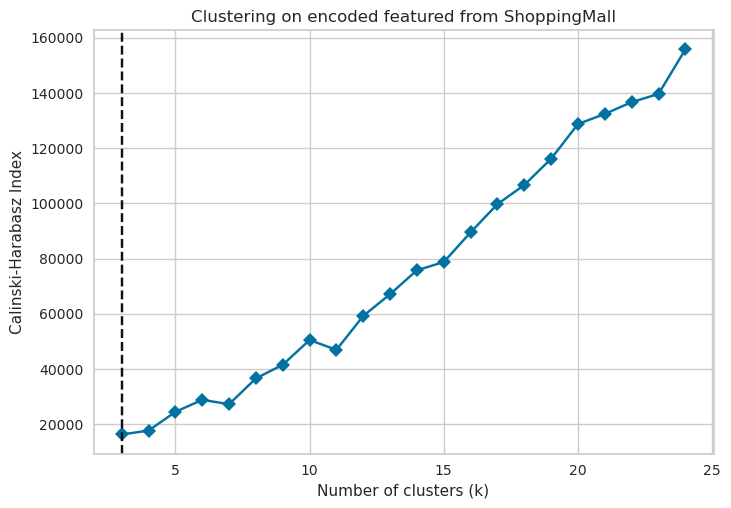

3


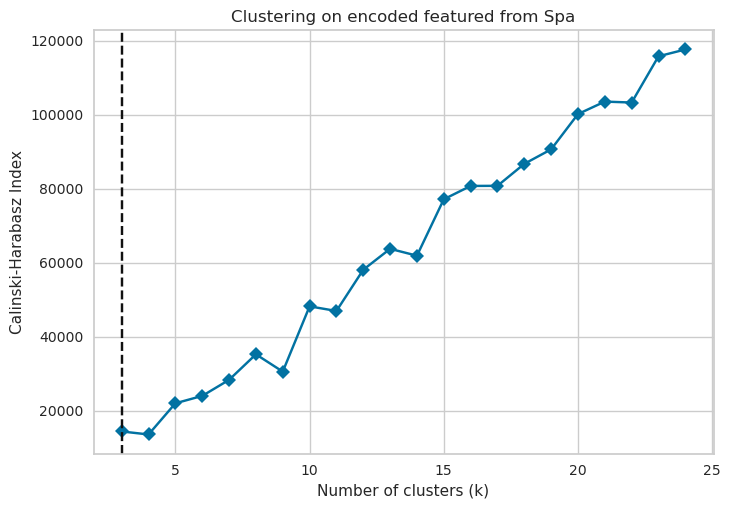

3


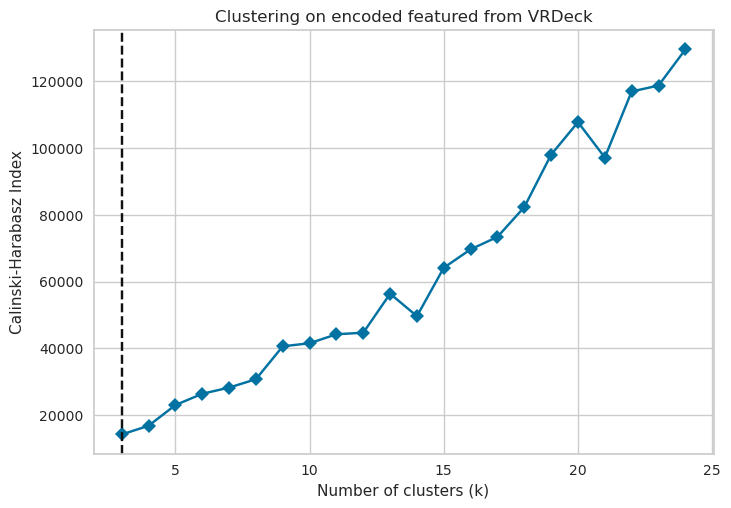

3


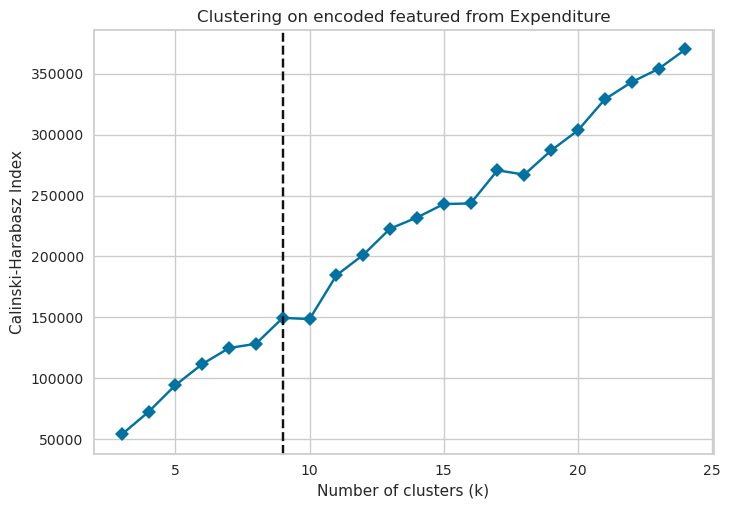

9


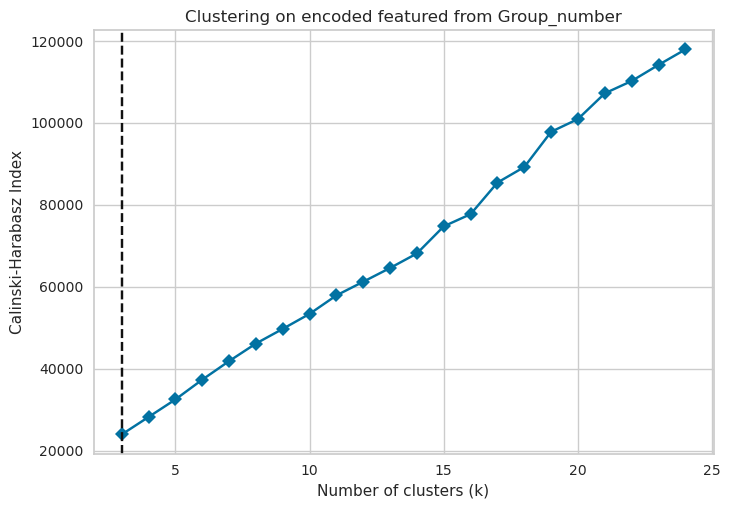

3


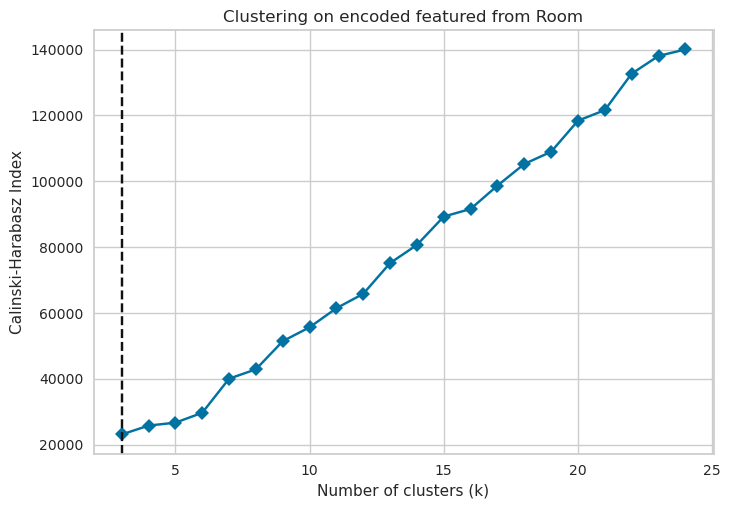

3
+----------------------------+--------------------+
|          Feature           |       CV-ACC       |
+----------------------------+--------------------+
|   Expenditure_yeojohnson   | 0.7380617171276272 |
|     Expenditure_pow025     | 0.7380617171276272 |
|   Expenditure_log_pow035   | 0.7380617171276272 |
|  Expenditure_pca_combined  | 0.7380617171276272 |
|     Expenditure_pow01      | 0.7379467745988917 |
|   Expenditure_log_pow01    | 0.7379467745988917 |
|     Expenditure_pow035     | 0.7379467745988917 |
|      Expenditure_sqrt      | 0.7377166250016535 |
|     Expenditure_boxcox     | 0.7372564580770604 |
| Expenditure_cluster_mean_  | 0.7365662738251129 |
|      Expenditure_log       | 0.7356460722458102 |
|     Expenditure_ohe_1      | 0.7003177122600954 |
|    Expenditure_cluster_    | 0.6986021718714867 |
|   RoomService_log_pow01    | 0.6703050143512823 |
|      RoomService_sqrt      | 0.6701899395526631 |
|     RoomService_pow01      | 0.6701899395526631 |
|     Room

In [ ]:

encode_category(submition_cleaner)
submition_cleaner, new_categorical_features = categorical_features_creation(submition_cleaner, categorical_features, eliminate_features=False)
submition_cleaner = tfidf_transfrom(submition_cleaner, 'Surname',1000,5)
submition_cleaner, new_numeric_features, cv_results = numeric_woe(submition_cleaner, numeric_features, 0.7)


In [ ]:
[col for col in unimportant_features if 'Home' in col]

[]

In [ ]:
submition_cleaner, unimp_pca_features = pca_unimportant_cols(submition_cleaner, numeric_features, unimportant_features)

In [ ]:
submition_cleaner[0][TRAIN_SET]

KeyError: "['Age_cluster_mean_final', 'Expenditure_corrdrop_pca', 'ShoppingMall_cluster_final', 'Room_corrdrop_pca', 'Age_corrdrop_pca', 'Group_number_cluster_final', 'RoomService_corrdrop_pca', 'ShoppingMall_corrdrop_pca', 'VRDeck_cluster_final', 'FoodCourt_cluster_final', 'Age_final_pca', 'VRDeck_corrdrop_pca', 'HomePlanet_ohe_1', 'Spa_cluster_final', 'Spa_corrdrop_pca', 'RoomService_final_pca', 'HomePlanet_ohe_2', 'Group_number_cluster_mean_final', 'ShoppingMall_cluster_mean_final', 'Expenditure_cluster_final', 'FoodCourt_corrdrop_pca', 'Age_cluster_final', 'Group_number_corrdrop_pca'] not in index"

In [ ]:
# import textwrap

# REMOVE = ['PassengerId']
# features = list(set(submition_cleaner[0].columns) - set([TARGET]) - set(REMOVE))
# wrapped_list = textwrap.fill(str(features), width=150)
# print(wrapped_list)

# TEST_SET = list(set(features ) -set(REMOVE)) 

['Group_size_count_label', 'Age_cluster_mean_final', 'Expenditure_ohe_1', 'HomePlanet', 'Expenditure', 'Deck', 'Age_group_ohe_0',
'ShoppingMall_ohe_2', 'Room_region6', 'Family_Size', 'Room_region3', 'Expenditure_corrdrop_pca', 'Group2_3_4', 'No_spending', 'Family_size',
'Side_count', 'ShoppingMall_log_pow01', 'Age_group', 'Destination_target_mean', 'Group_size_target_mean', 'RoomService_cluster_final',
'Room_corrdrop_pca', 'Passanger_number', 'CryoSleep', 'Age_group_target_mean', 'Expenditure_pow025', 'VRDeck_ohe_0', 'Expenditure_unimp_pca',
'Room_unimp_pca', 'Age_corrdrop_pca', 'Deck_target_mean', 'FoodCourt_cluster_mean_final', 'Room_region1', 'Room_region', 'Room',
'Group_number_cluster_final', 'RoomService_corrdrop_pca', 'ShoppingMall_corrdrop_pca', 'VRDeck_pca_combined', 'Room_region2', 'VIP',
'VRDeck_log_pow01', 'Solo', 'Spa_cluster_', 'Age_unimp_pca', 'Group_size_cluster_', 'Room_region_target_mean', 'Destination', 'VRDeck',
'Group_number', 'VRDeck_corrdrop_pca', 'Group_number_u

In [ ]:
len([test for test in TEST_SET if test  in TRAIN_SET ])

64

In [ ]:
len(TEST_SET)

92

In [ ]:
from sklearn.ensemble import VotingClassifier

final_votting = VotingClassifier([('xgb', xgb), ('lgb', lgb), ('cat', cat)], voting='soft').fit(submition_cleaner[0][TEST_SET], submition_cleaner[0][TARGET])


[LightGBM] [Info] Number of positive: 4378, number of negative: 4315
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001865 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8934
[LightGBM] [Info] Number of data points in the train set: 8693, number of used features: 92
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503624 -> initscore=0.014495
[LightGBM] [Info] Start training from score 0.014495
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

In [ ]:
result = submition_cleaner[1][['PassengerId']]
result['Transported'] = final_votting.predict(submition_cleaner[1][TEST_SET])

result.to_csv('OHE_added_without_optuna_ensamble.csv', index=False)

In [ ]:
final_votting.estimators[0][1].fit(submition_cleaner[0][TEST_SET], submition_cleaner[0][TARGET])

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5261725028537225, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=2.060489453440812,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.010075186055558712,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=6, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=138, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

<Axes: ylabel='feature'>

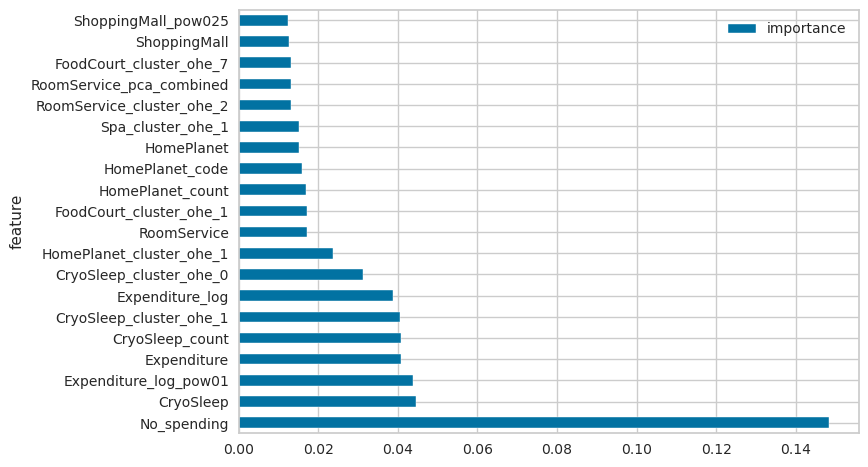

In [ ]:
importance = pd.DataFrame({'feature': final_votting.estimators[0][1].feature_names_in_, 'importance': final_votting.estimators[0][1].feature_importances_}).sort_values(by='importance', ascending=False).set_index('feature')
importance[:20].plot(kind='barh')